# Citi for Sale


In [1]:
import sys
import os
import pandas as pd
import numpy as np
import time
import requests

# For creating cool charts :)
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib import image
import matplotlib as mpl
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.dates as mdates

# We load pre-defined functions, fonts and stylesheet.
module_path = os.path.abspath(os.path.join('../../../'))
if module_path not in sys.path:
    sys.path.append(module_path+"\\utils")
    sys.path.append(module_path+"\\assets")

from tukan_helper_functions import *

path = [x for x in sys.path if "utils" in x][0]

# Optional for TUKAN's mplstylesheet
plt.style.use(module_path + '\\utils\\tukan_style.mpl')

In [3]:
# Mobile banking for el mamon

x_dates = ["2016-03-01", "2016-06-01", "2016-09-01", "2016-12-01","2017-03-01", "2017-06-01", "2017-09-01", "2017-12-01", "2018-03-01", "2018-06-01", "2018-09-01", "2018-12-01", "2019-03-01", "2019-06-01", "2019-09-01", "2019-12-01"]

data = pd.DataFrame()

for x in x_dates:
    mb_payload = {
        "type": "data_table",
        "operation": "sum",
        "language": "es",
        "categories": {
        "institutions": [
            "02ab4b407c039ca",
            "ae882fe094ece03",
            "aac4b448da912c3",
            "75c12fa4df9cd5b",
            "47eb578e3bafd16",
            "0c959ae6bc0d063",
            "3c983392fcd35b9",
            "571cc07670cdfca"
        ],
            "geography": [
                "b815762a2c6a283"
            ]
        },
        "request": [
            {
                "table": "mex_cnbv_cb_operational",
                "variables": [
                    "164d316e22d6033"
                ]
            }
        ],
        "from":x,
        "to":x
    }
    response = get_tukan_api_request(mb_payload)
    data = data.append(response["data"])


Success getting the data
Success getting the data
Success getting the data
Success getting the data
Success getting the data
Success getting the data
Success getting the data
Success getting the data
Success getting the data
Success getting the data
Success getting the data
Success getting the data
Success getting the data
Success getting the data
Success getting the data
Success getting the data


In [6]:
data.to_csv("mobile_banking.csv", encoding = "iso-8859-1")

## Chart 1: Market Share in Decline

In [430]:
payload = {
    "type": "data_table",
    "operation": "sum",
    "language": "en",
    "categories": {
        "institutions": [
            "aac4b448da912c3",
            "0c959ae6bc0d063"
        ]
    },
    "request": [
        {
            "table": "mex_cnbv_cb_balance_sheet",
            "variables": [
                "aa9a4f2f8a95db3",
                "b4ea69bfe2b9735"
            ]
        }
    ],
    "from": "2000-01-11"
}

response = get_tukan_api_request(payload)
loan_data = response["data"]

Success getting the data


In [431]:
loan_data.loc[:,"total_loans"] = loan_data["aa9a4f2f8a95db3"] + loan_data["b4ea69bfe2b9735"]
loan_data = loan_data.pivot(index = "date", columns = "institutions", values="total_loans")

In [432]:
loan_data.loc[:,"mkt_share"] = loan_data["Banamex"]/loan_data["Commercial banks"]

In [38]:
loan_data
# 5.510915e+11/1000000000

(5.520553e+12/1.035610e+12)**(1/11)-1

0.164317663906572

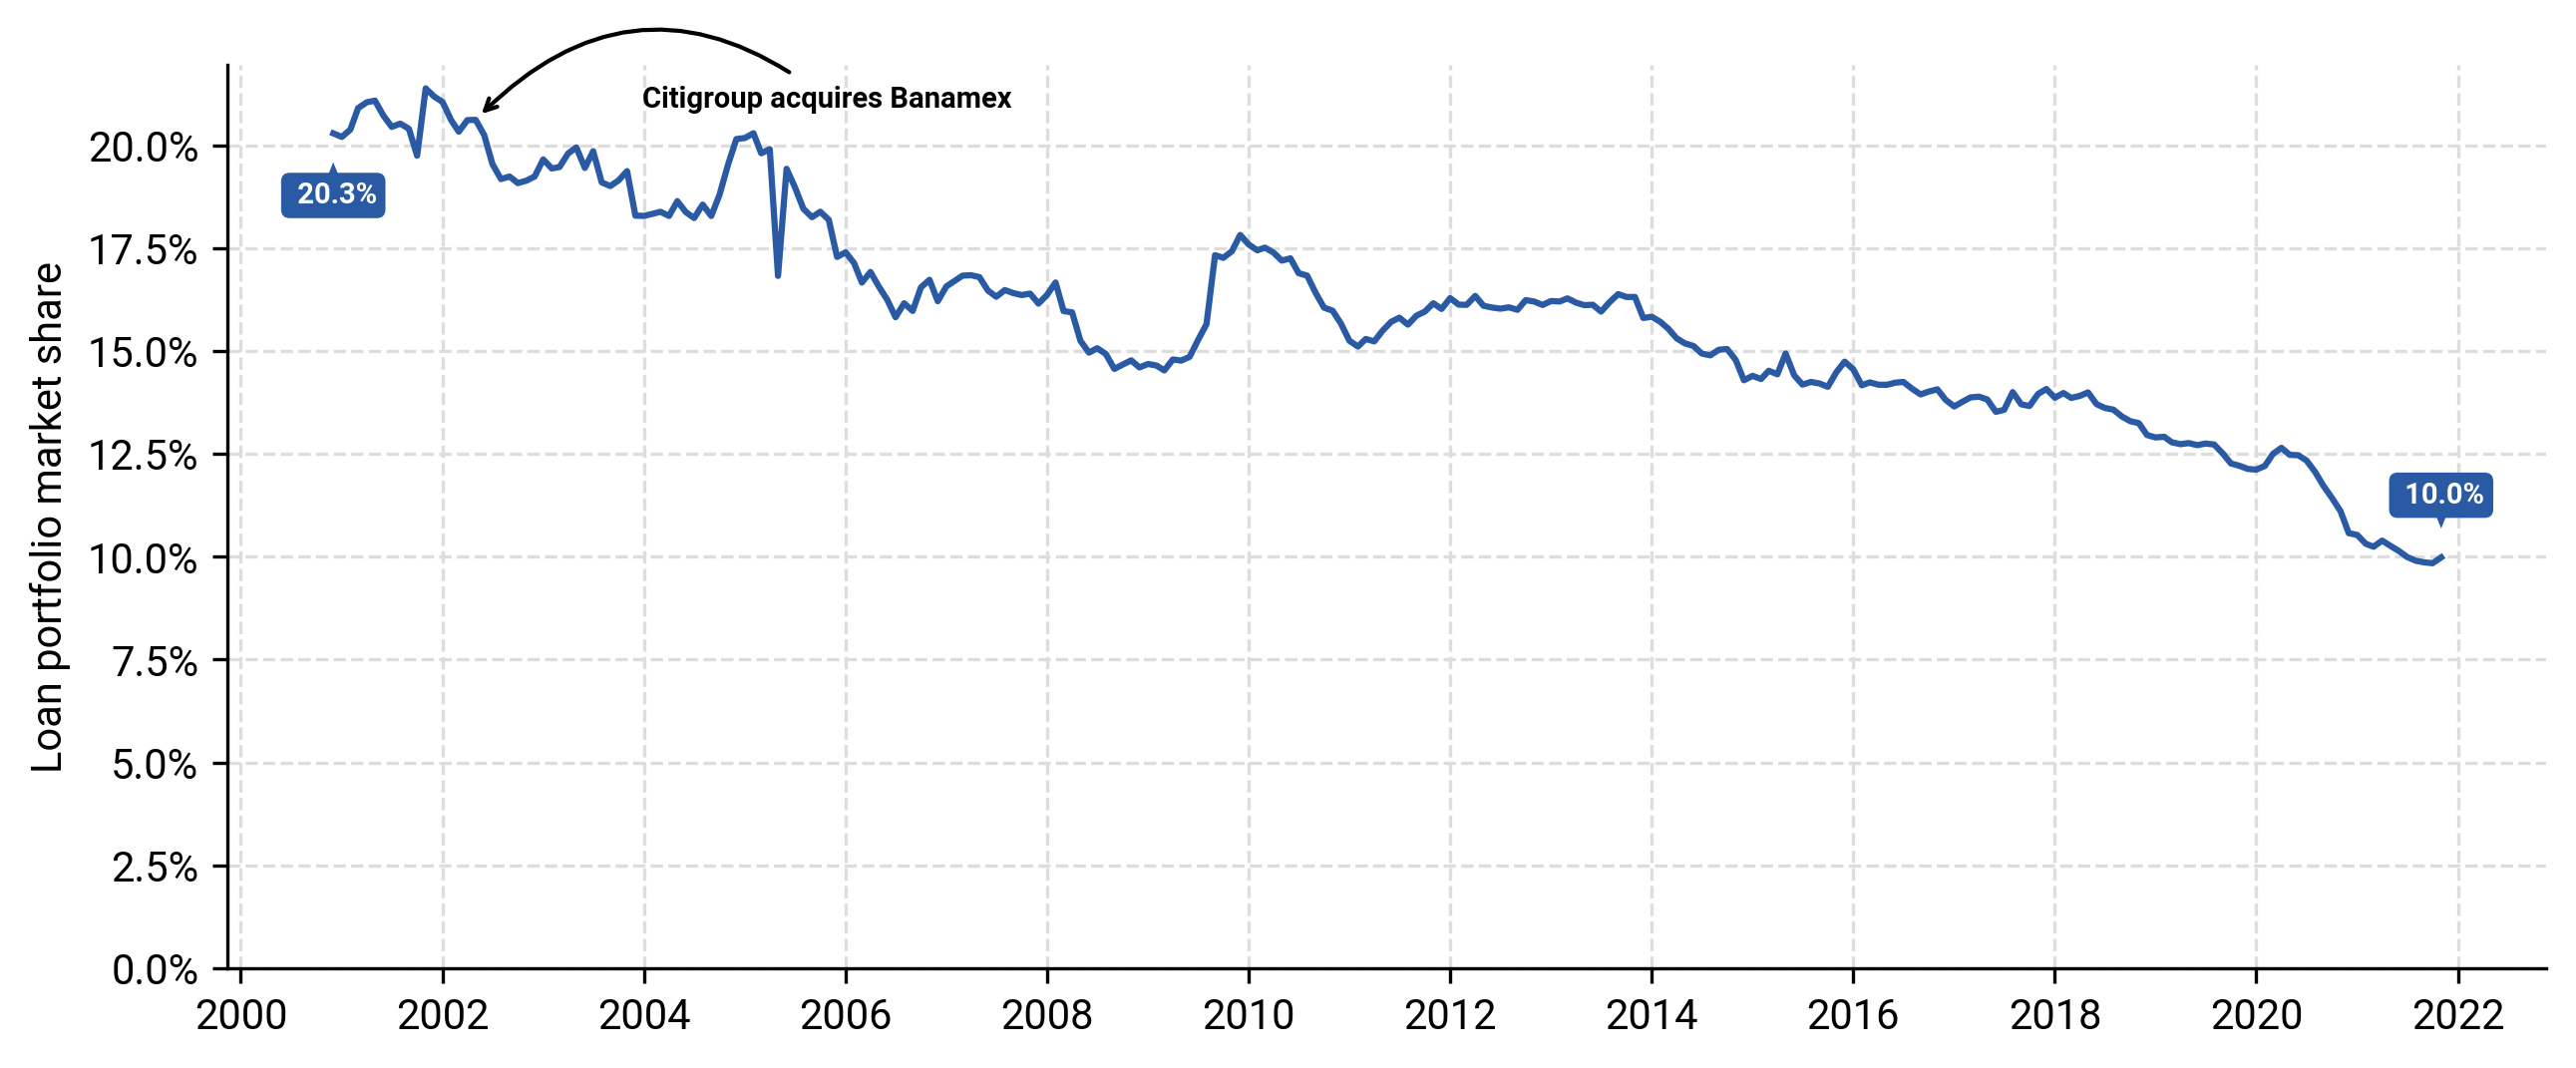

In [445]:
fig = plt.figure(figsize = (10, 4), dpi = 300)
ax = plt.subplot(111)

ax.plot(loan_data.index, loan_data["mkt_share"])

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.1%}'))
ax.yaxis.set_label_text("Loan portfolio market share")

ax.xaxis.set_major_locator(mdates.YearLocator(2))

ax.set_ylim(0)
X = loan_data.index[-1]
Y = loan_data["mkt_share"].iloc[-1]
ax.annotate(
    " " + str(round(Y*100,1)) + "%",
    xy=(X, Y + 0.005),
    xycoords="data",
    xytext=(0, 10),
    textcoords="offset points",
    color="white",
    size=7,
    va="center",
    ha="center",
    weight="bold",
    bbox=dict(boxstyle="round", fc="#2B5AA5", ec="none"),
    arrowprops=dict(
        arrowstyle="wedge,tail_width=.7", fc="#2B5AA5", ec="none", patchA=None
    ),
)

X = loan_data.index[17]
Y = loan_data["mkt_share"].iloc[17]

ax.annotate(
    "Citigroup acquires Banamex",
    xy=(X, Y),
    xycoords="data",
    xytext=(40, 5),
    textcoords="offset points",
    color="black",
    size=7,
    va="center",
    ha="left",
    weight="bold",
    arrowprops=dict(
        arrowstyle="->", ec="black", connectionstyle="arc3,rad=.45"
    ),
)


X = loan_data.index[0]
Y = loan_data["mkt_share"].iloc[0]
ax.annotate(
    " " + str(round(Y*100,1)) + "%",
    xy=(X, Y - 0.005),
    xycoords="data",
    xytext=(0, -10),
    textcoords="offset points",
    color="white",
    size=7,
    va="center",
    ha="center",
    weight="bold",
    bbox=dict(boxstyle="round", fc="#2B5AA5", ec="none"),
    arrowprops=dict(
        arrowstyle="wedge,tail_width=.7", fc="#2B5AA5", ec="none", patchA=None
    ),
)

plt.savefig(
    "plots/citi_loan_mkt_share.svg",
    dpi=300,
    bbox_inches="tight",
    facecolor="white",
    edgecolor="none",
    transparent=False,
)


## Chart 2: ROE and NIM

In [434]:
payload = {
    "type": "data_table",
    "operation": "sum",
    "language": "en",
    "categories": {
        "institutions": "all"
    },
    "request": [
        {
            "table": "mex_cnbv_cb_balance_sheet",
            "variables": [
                  "e45fb5b929acd55",
                  "3b64c196a705595",
                  "16b0c56b0671f04",
                  "aa9a4f2f8a95db3",
                  "aaabada5fb35b5e"
            ]
        }
    ],
    "from": "2000-01-11"
}

bs_response = get_tukan_api_request(payload)
bs_data = bs_response["data"]


Success getting the data


In [435]:
payload = {
    "type": "data_table",
    "operation": "sum",
    "language": "en",
    "categories": {
        "institutions": "all"
    },
    "request": [
        {
            "table": "mex_cnbv_cb_income_statement",
            "variables": [
                  "41ed2726f53af05",
                  "b20c1d56c3cbe96",
                  "144b301e50c7a67"
            ]
        }
    ],
    "from": "2000-01-11"
}

is_response = get_tukan_api_request(payload)
is_data = is_response["data"]

Success getting the data


In [436]:
merged_df = pd.merge(is_data, bs_data)
merged_df.sort_values(by = ['institutions__ref', 'date'], inplace = True)
merged_df = merged_df.reset_index(drop = True).copy()

In [437]:
# LTM Profit (loss)
merged_df.loc[:,'ltm_profit'] = (
    merged_df.groupby(['institutions__ref'])
    .rolling(on="date", window=12, min_periods=12)['41ed2726f53af05']
    .sum()
    .reset_index(drop = True)
)

# LTM (Net interest income)
merged_df.loc[:,'ltm_nii'] = (
    merged_df.groupby(['institutions__ref'])
    .rolling(on='date', window=12, min_periods=12)['b20c1d56c3cbe96']
    .sum()
    .reset_index(drop = True)
) - (
    merged_df.groupby(['institutions__ref'])
    .rolling(on='date', window=12, min_periods=12)['144b301e50c7a67']
    .sum()
    .reset_index(drop = True)
) 

# Average equity
merged_df.loc[:,'ltm_equity'] = (
    merged_df.groupby(['institutions__ref'])
    .rolling(on='date', window=12, min_periods=12)['aaabada5fb35b5e']
    .mean()
    .reset_index(drop = True)
)

# Productive assets
merged_df.loc[:,'prod_assets'] = (
    merged_df.loc[:,'e45fb5b929acd55'] +
    merged_df.loc[:,'3b64c196a705595'] +
    merged_df.loc[:,'16b0c56b0671f04'] + 
    merged_df.loc[:,'aa9a4f2f8a95db3']
)

# Average productive assets
merged_df.loc[:,'ltm_prod_assets'] = (
    merged_df.groupby(['institutions__ref'])
    .rolling(on='date', window=12, min_periods=12)['prod_assets']
    .mean()
    .reset_index(drop = True)
)

#-----------------------------------------------------------------------------
# Compute the financial ratios
#-----------------------------------------------------------------------------

merged_df.loc[:,'roe'] = merged_df.loc[:,'ltm_profit'] / merged_df.loc[:,'ltm_equity']
merged_df.loc[:,'nim'] = merged_df.loc[:,'ltm_nii'] / merged_df.loc[:,'ltm_prod_assets']


In [438]:
g7_banks = ["BBVA Bancomer","Banorte","Santander México","Banamex","Scotiabank Inverlat","HSBC México","Banco Inbursa"]
g7_df = merged_df[merged_df["institutions"].isin(g7_banks)]


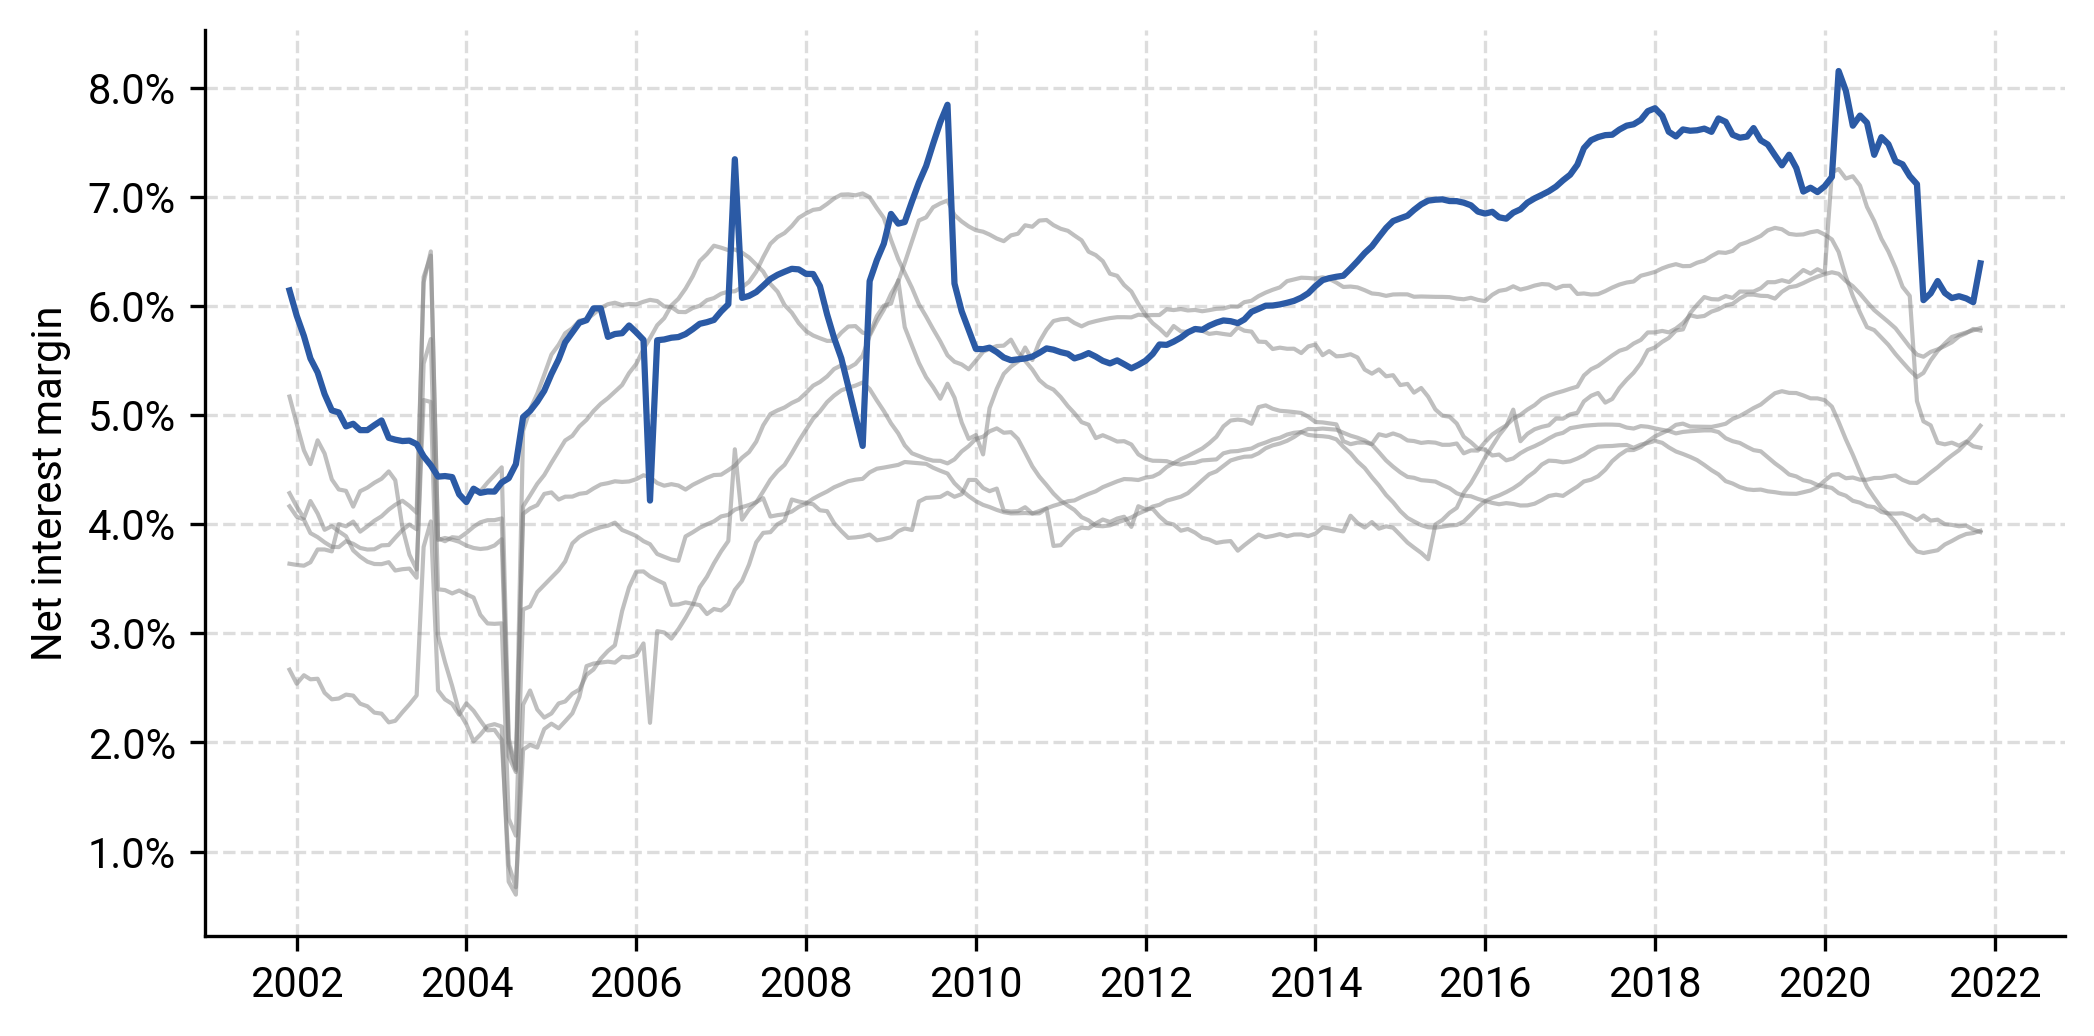

In [439]:
fig = plt.figure(figsize = (8, 4), dpi = 300)
ax = plt.subplot(111)

for x in g7_df["institutions"].unique():
    aux_df = g7_df[g7_df["institutions"] == x].copy()
    if x == "Banamex":
        ax.plot(aux_df["date"], aux_df["nim"], label = x, zorder = 20)
    elif x == "HSBC México":
        aux_df = aux_df[aux_df["date"] > "2004-01-01"]
        ax.plot(aux_df["date"], aux_df["nim"], color = "gray", alpha = 0.5, linewidth = 1)
    else:
        ax.plot(aux_df["date"], aux_df["nim"], color = "gray", alpha = 0.5, linewidth = 1)
    


ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.1%}'))
ax.xaxis.set_major_locator(mdates.YearLocator(2))

ax.yaxis.set_label_text("Net interest margin")
plt.savefig(
    "plots/nim_banamex.svg",
    dpi=300,
    bbox_inches="tight",
    facecolor="white",
    edgecolor="none",
    transparent=False,
)

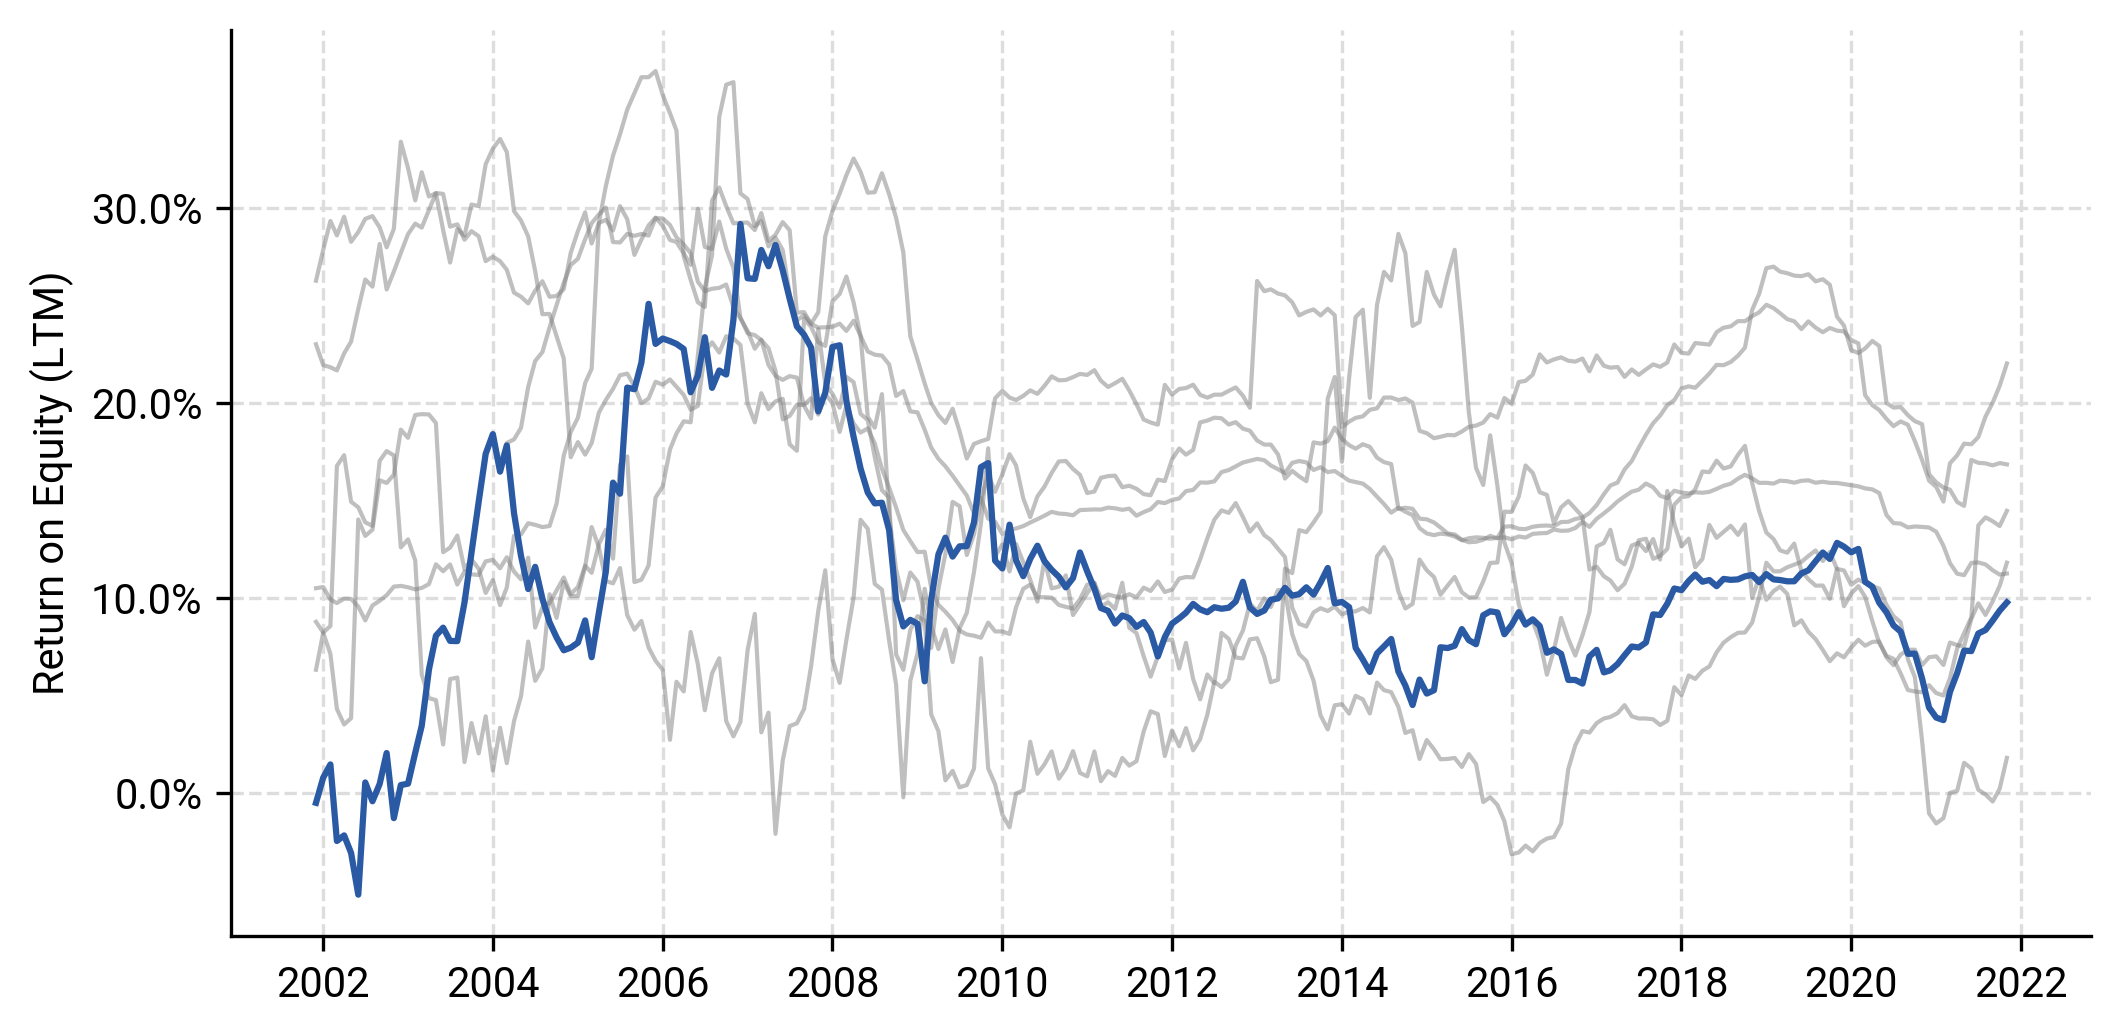

In [440]:
fig = plt.figure(figsize = (8, 4), dpi = 300)
ax = plt.subplot(111)

for x in g7_df["institutions"].unique():
    aux_df = g7_df[g7_df["institutions"] == x].copy()
    if x == "Banamex":
        ax.plot(aux_df["date"], aux_df["roe"], label = x, zorder = 20)
    elif x == "HSBC México":
        aux_df = aux_df[aux_df["date"] > "2004-01-01"]
        ax.plot(aux_df["date"], aux_df["roe"], color = "gray", alpha = 0.5, linewidth = 1)
    else:
        ax.plot(aux_df["date"], aux_df["roe"], color = "gray", alpha = 0.5, linewidth = 1)
    


ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.1%}'))
ax.xaxis.set_major_locator(mdates.YearLocator(2))

ax.yaxis.set_label_text("Return on Equity (LTM)")
plt.savefig(
    "plots/roe_banamex.svg",
    dpi=300,
    bbox_inches="tight",
    facecolor="white",
    edgecolor="none",
    transparent=False,
)

## Chart 4: Banking Deposits

In [441]:
payload = {
    "type": "data_table",
    "operation": "sum",
    "language": "en",
    "categories": {
        "institutions": "all"
    },
    "request": [
        {
            "table": "mex_cnbv_cb_balance_sheet",
            "variables": [
                "f26c53c213511d1",
                "893fe1f7da06f33"
            ]
        }
    ],
}

response = get_tukan_api_request(payload)
deposit_data = response["data"]

Success getting the data


In [442]:
deposit_data.loc[:,"funding"] = deposit_data["f26c53c213511d1"] + deposit_data["893fe1f7da06f33"]
deposit_data.loc[:,"mkt_share"] = deposit_data["funding"]/deposit_data[deposit_data["institutions"] == "Commercial banks"]["funding"].iloc[0]
deposit_data = deposit_data[deposit_data["institutions"] != "Commercial banks"].copy()
deposit_data = deposit_data.sort_values(by = "mkt_share", ascending=False)
deposit_data = deposit_data.head(5)

In [443]:
deposit_data

,date,institutions__ref,institutions,893fe1f7da06f33,f26c53c213511d1,funding,mkt_share
37,2021-11-01,ae882fe094ece03,BBVA Bancomer,2.342143e+11,1.207849e+12,1.442064e+12,0.234610
36,2021-11-01,aac4b448da912c3,Banamex,1.532482e+11,7.233074e+11,8.765555e+11,0.142607
0,2021-11-01,02ab4b407c039ca,Banorte,2.487156e+11,5.324557e+11,7.811713e+11,0.127089
28,2021-11-01,75c12fa4df9cd5b,Santander México,2.158363e+11,5.559097e+11,7.717461e+11,0.125556
15,2021-11-01,47eb578e3bafd16,HSBC México,1.240179e+11,3.529777e+11,4.769956e+11,0.077603


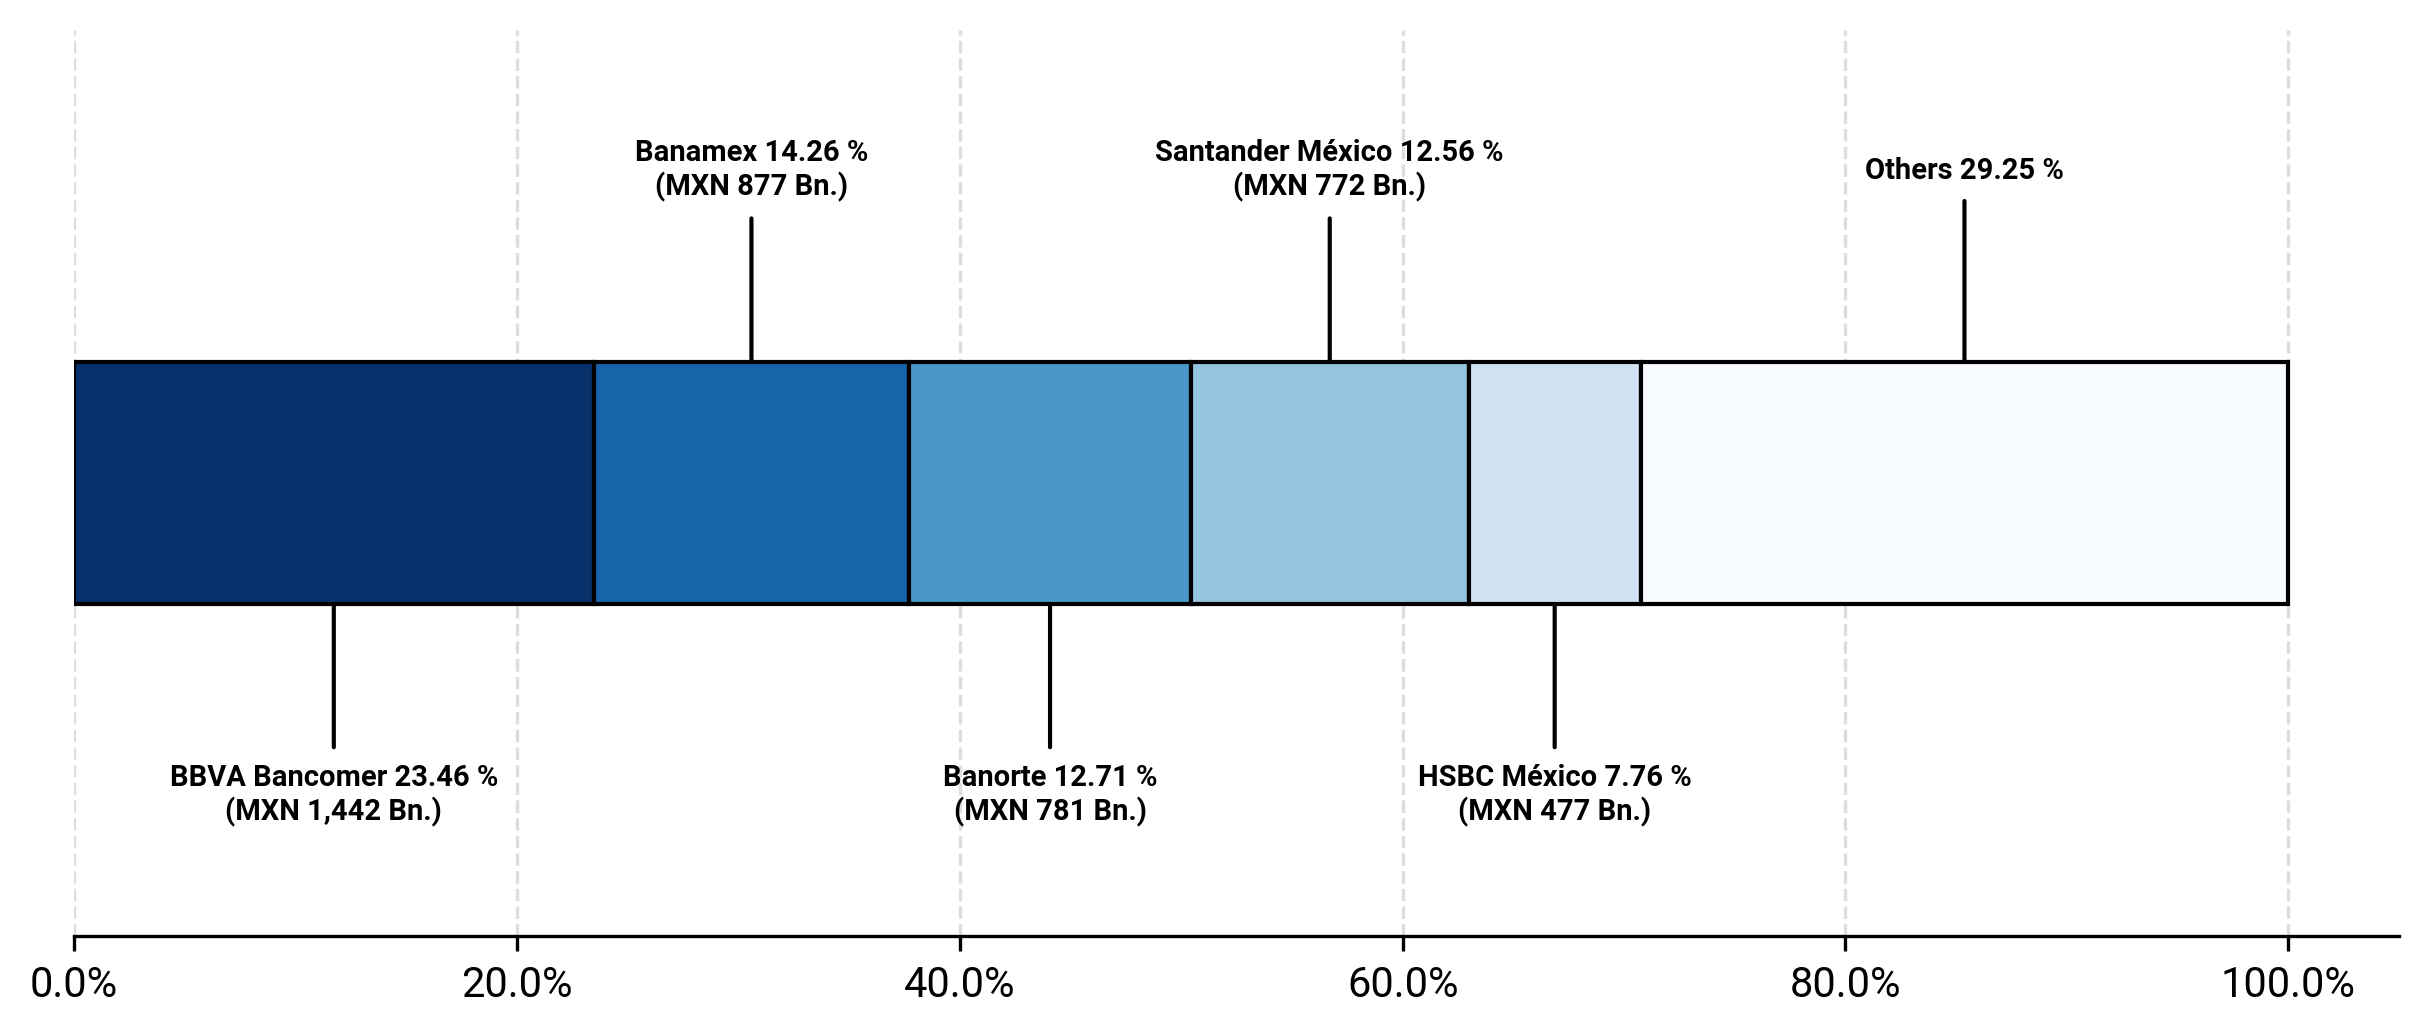

In [444]:
fig = plt.figure(figsize = (10, 4), dpi = 300)
ax = plt.subplot(111)

ax.spines["left"].set_visible(False)
ax.yaxis.set_visible(False)
cmap = mpl.cm.get_cmap("Blues_r", 6)

left = 0
for index, data in enumerate(deposit_data["mkt_share"]):
    institution = deposit_data["institutions"].iloc[index]
    funding = deposit_data["funding"].iloc[index]/1000000000
    if index % 2 == 0:
        mult_aux = -1
    else:
        mult_aux = 1
    ax.annotate(
        f"{institution} {round(data*100,2)} %\n(MXN {funding:,.0f} Bn.)",
        xy=(left + data/2, 0),
        xycoords="data",
        xytext=(0, mult_aux*75),
        textcoords="offset points",
        color="black",
        size=7,
        va="center",
        ha="center",
        weight="bold",
        arrowprops=dict(
        arrowstyle="->", ec="black", connectionstyle="arc3"
        ),
    )
    if deposit_data["institutions"].iloc[index] == "Banamex":
        ax.barh(0, data, left=left, zorder = 3, ec = "black", color = cmap(index))      
    else:
        ax.barh(0, data, left=left, zorder = 3, ec = "black", color = cmap(index))
    left += data


ax.annotate(
    f"Others {round((1 - left)*100,2)} %",
    xy=(left + (1 - left)/2, 0),
    xycoords="data",
    xytext=(0, 1*75),
    textcoords="offset points",
    color="black",
    size=7,
    va="center",
    ha="center",
    weight="bold",
    arrowprops=dict(
    arrowstyle="->", ec="black", connectionstyle="arc3"
    ),
)
ax.barh(0, 1 - left, left=left, zorder = 3, ec = "black", color = cmap(6))

ax.set_ylim(-1.5,1.5)
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.1%}'))
plt.savefig(
    "plots/deposit_mkt_share.svg",
    dpi=300,
    bbox_inches="tight",
    facecolor="white",
    edgecolor="none",
    transparent=False,
)

## Branches

In [536]:
hist_branch_data = pd.DataFrame()
for x in ["2012-12-01", "2013-12-01", "2014-12-01","2015-12-01","2016-12-01","2017-12-01","2018-12-01","2019-12-01","2020-12-01","2021-11-01"]:
    payload = {
        "type": "data_table",
        "operation": "sum",
        "language": "es",
        "group_by": [
            "institutions"
        ],
        "categories": {
            "institutions": ["aac4b448da912c3", "ae882fe094ece03"]
        },
        "request": [
            {
                "table": "mex_cnbv_cb_operational",
                "variables": [
                    "2eee037c67fbe81",
                    "21879990c9338ac"
                ]
            }
        ],
        "from": x,
        "to": x
    }

    response = get_tukan_api_request(payload)
    hist_branch_data = hist_branch_data.append(response["data"])

# hist_branch_data.loc[:,'employees'] = hist_branch_data.loc[:,'c3f78436c051fcd'] + (hist_branch_data.loc[:,'21879990c9338ac'])

Success getting the data
Success getting the data
Success getting the data
Success getting the data
Success getting the data
Success getting the data
Success getting the data
Success getting the data
Success getting the data
Success getting the data


In [447]:
state_data = {
    "type": "data_table",
    "operation": "sum",
    "language": "en",
    "categories": {
        "geography": [
            "a11e95a3853fb69",
            "360a302c378e710",
            "247c9cacf4224b6",
            "6ac5967cbf3837a",
            "41898e9ee8eca2e",
            "df4199cdf95d9a2",
            "a3610ba4cc376e9",
            "18586f4a5105126",
            "1066aeadf0e6b1d",
            "db3b32c946ffd13",
            "35f06e5ac6c66c6",
            "a3aa918bd45ac53",
            "71ecab7f1483f68",
            "361653ebbec7c01",
            "85b7cf10a7ca78c",
            "c51b7a801a43fde",
            "75bb26080da6e48",
            "d3d2e9958774cf3",
            "6dc16b1f0f610dc",
            "16600f577a6aa5d",
            "bd8b4a37deee845",
            "c8632592a7df381",
            "ff9e50f58bb1ce3",
            "468bc66c95ecfe6",
            "bb5cbe0609bca7d",
            "503feee7604f872",
            "66fc4903e4ffb94",
            "4f875e6e2443514",
            "5ec6f2e8362d8b2",
            "f22e4d8e77ae9bf",
            "4beb98148056b4e",
            "737125369fa1d94"
        ],
        "institutions": "all"
    },
    "request": [
        {
            "table": "mex_cnbv_cb_operational",
            "variables": [
                "2eee037c67fbe81"
            ]
        }
    ],
    "from": "2021-11-01",
    "to": "2021-11-01",
}

response = get_tukan_api_request(state_data)

Success getting the data


In [448]:
branch_data = response["data"]

In [456]:
hist_branch_data.sort_values(by = ['institutions__ref', 'date'], inplace = True)
hist_branch_data = hist_branch_data.reset_index(drop = True).copy()
hist_branch_data.loc[:,"lag"] = hist_branch_data.groupby("institutions__ref")["2eee037c67fbe81"].shift(1)

In [459]:
hist_branch_data.loc[:,"yoy_growth"] = hist_branch_data["2eee037c67fbe81"]/hist_branch_data["lag"] - 1

In [449]:
branch_data_state = branch_data.groupby(["geography__ref"]).sum().reset_index()
branch_data_state.rename(columns = {"2eee037c67fbe81":"total_branches"}, inplace = True)
branch_data = pd.merge(branch_data, branch_data_state, how = "left")

In [450]:
branch_data.loc[:,"mkt_share"] = branch_data["2eee037c67fbe81"]/branch_data["total_branches"]

In [451]:
branch_data.loc[:,"rank"] =  branch_data.groupby("geography__ref")["mkt_share"].rank("dense", ascending=False)

In [230]:
import geopandas as gpd

In [231]:
# df_mun = gpd.read_file("../../../assets/maps/00mun.shp")
df_edo = gpd.read_file("../../../assets/maps/00ent.shp")

#INEGI - TUKAN geography mapping

inegi_tukan_map = pd.read_csv('../../../assets/maps/inegi_geography_map.csv', dtype={'CVEGEO':'str'})

# And we apply the mapping to the shapefile

# df_mun = pd.merge(df_mun, inegi_tukan_map[['CVEGEO', 'CVEGEO_tukan']], how = 'left', on = 'CVEGEO')
df_edo = pd.merge(df_edo, inegi_tukan_map[['CVEGEO', 'CVEGEO_tukan']], how = 'left', on = 'CVEGEO')

#Rename columns
# df_mun.rename(columns = {'CVEGEO_tukan':'geography__ref'}, inplace = True)
df_edo.rename(columns = {'CVEGEO_tukan':'geography__ref'}, inplace = True)

In [452]:
branch_data = branch_data[branch_data["institutions"] == "Banamex"]
branch_data = pd.merge(df_edo, branch_data, on = "geography__ref")

In [ ]:
fig = plt.figure(figsize=(8, 4), dpi = 300)

ax1 = plt.subplot(111)

ax1.axes.set_axis_off()


branch_data.plot("mkt_share", ax = ax1, cmap = "Blues", linewidths = 0.2, edgecolor = "black")

# --- Dummy heatmap
heatmap=ax2.imshow([branch_data.mkt_share], cmap = "Blues")
heatmap.set_visible(False)
fig.colorbar(heatmap, fraction=0.025, pad=0.1, format = ticker.StrMethodFormatter('{x:,.0%}'), ax = ax1, extend='both')
plt.tight_layout()
plt.savefig(
    "plots/branches_local_mkt_share.svg",
    dpi=300,
    bbox_inches="tight",
    facecolor="white",
    edgecolor="none",
    transparent=False,
)

In [462]:
hist_branch_data.shape[0]

20

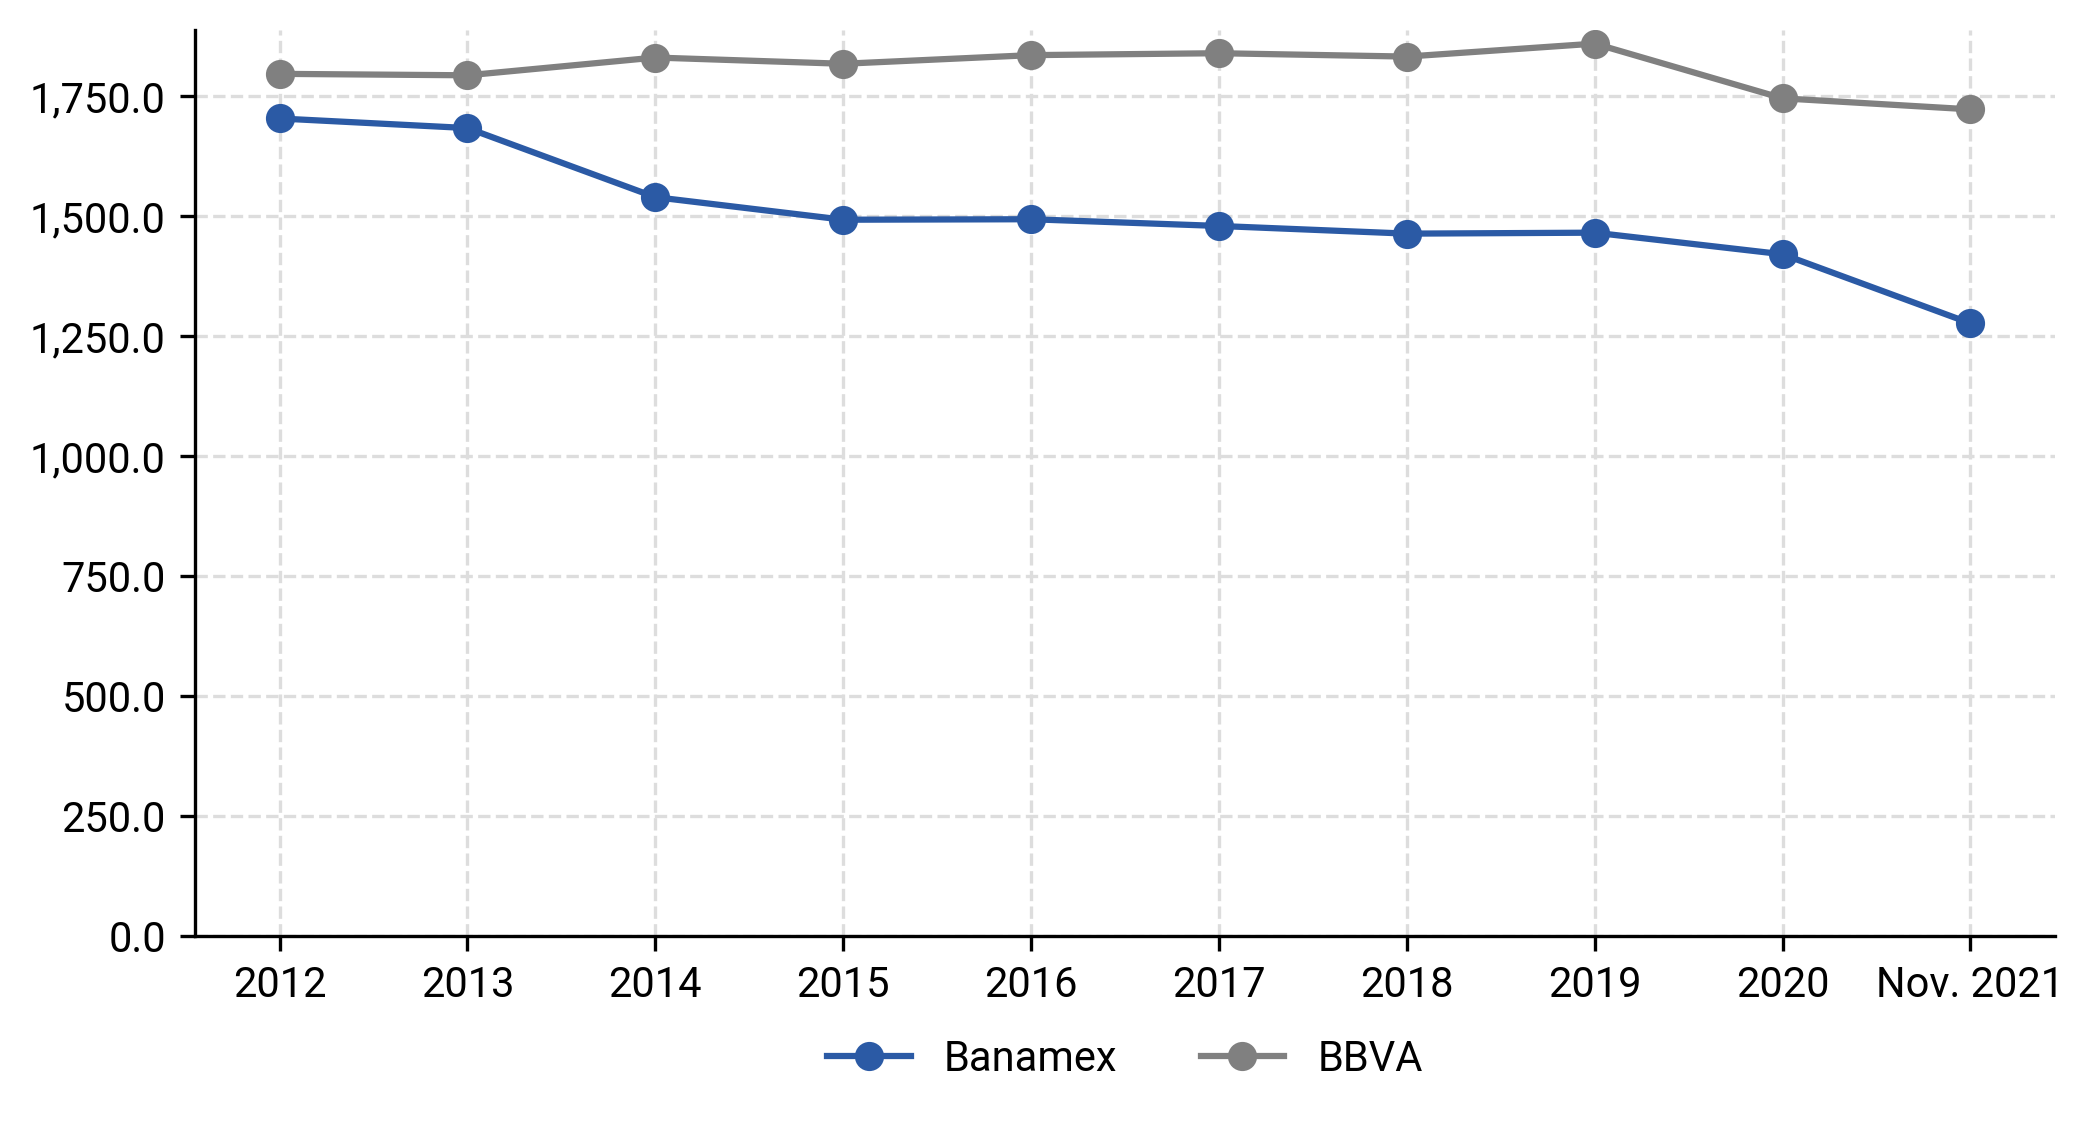

In [542]:
fig = plt.figure(figsize=(8, 4), dpi = 300)

ax = plt.subplot(111)

ax.plot(range(0,10), hist_branch_data[hist_branch_data["institutions"] == "Banamex"]["2eee037c67fbe81"],  zorder = 3, label = "Banamex", marker = "o")
ax.plot(range(0,10), hist_branch_data[hist_branch_data["institutions"] == "BBVA Bancomer"]["2eee037c67fbe81"],  zorder = 3, label = "BBVA", color = "gray", marker = "o")
xticks = ax.xaxis.set_ticks(range(0,10))
xticklabels = ax.xaxis.set_ticklabels([str(x) for x in range(2012,2021)] + ["Nov. 2021"])
# ax.xaxis.se([str(x) for x in range(2012,2022)])
# ax.xasi
# ax.hlines(0, xmin = 0, xmax = 10, color = "black")
ax.set_ylim(0)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.1f}'))
ax.legend(loc="lower center", bbox_to_anchor=(0.5, -0.2), ncol = 2)
plt.savefig(
    "plots/total_branches.svg",
    dpi=300,
    bbox_inches="tight",
    facecolor="white",
    edgecolor="none",
    transparent=False,
)

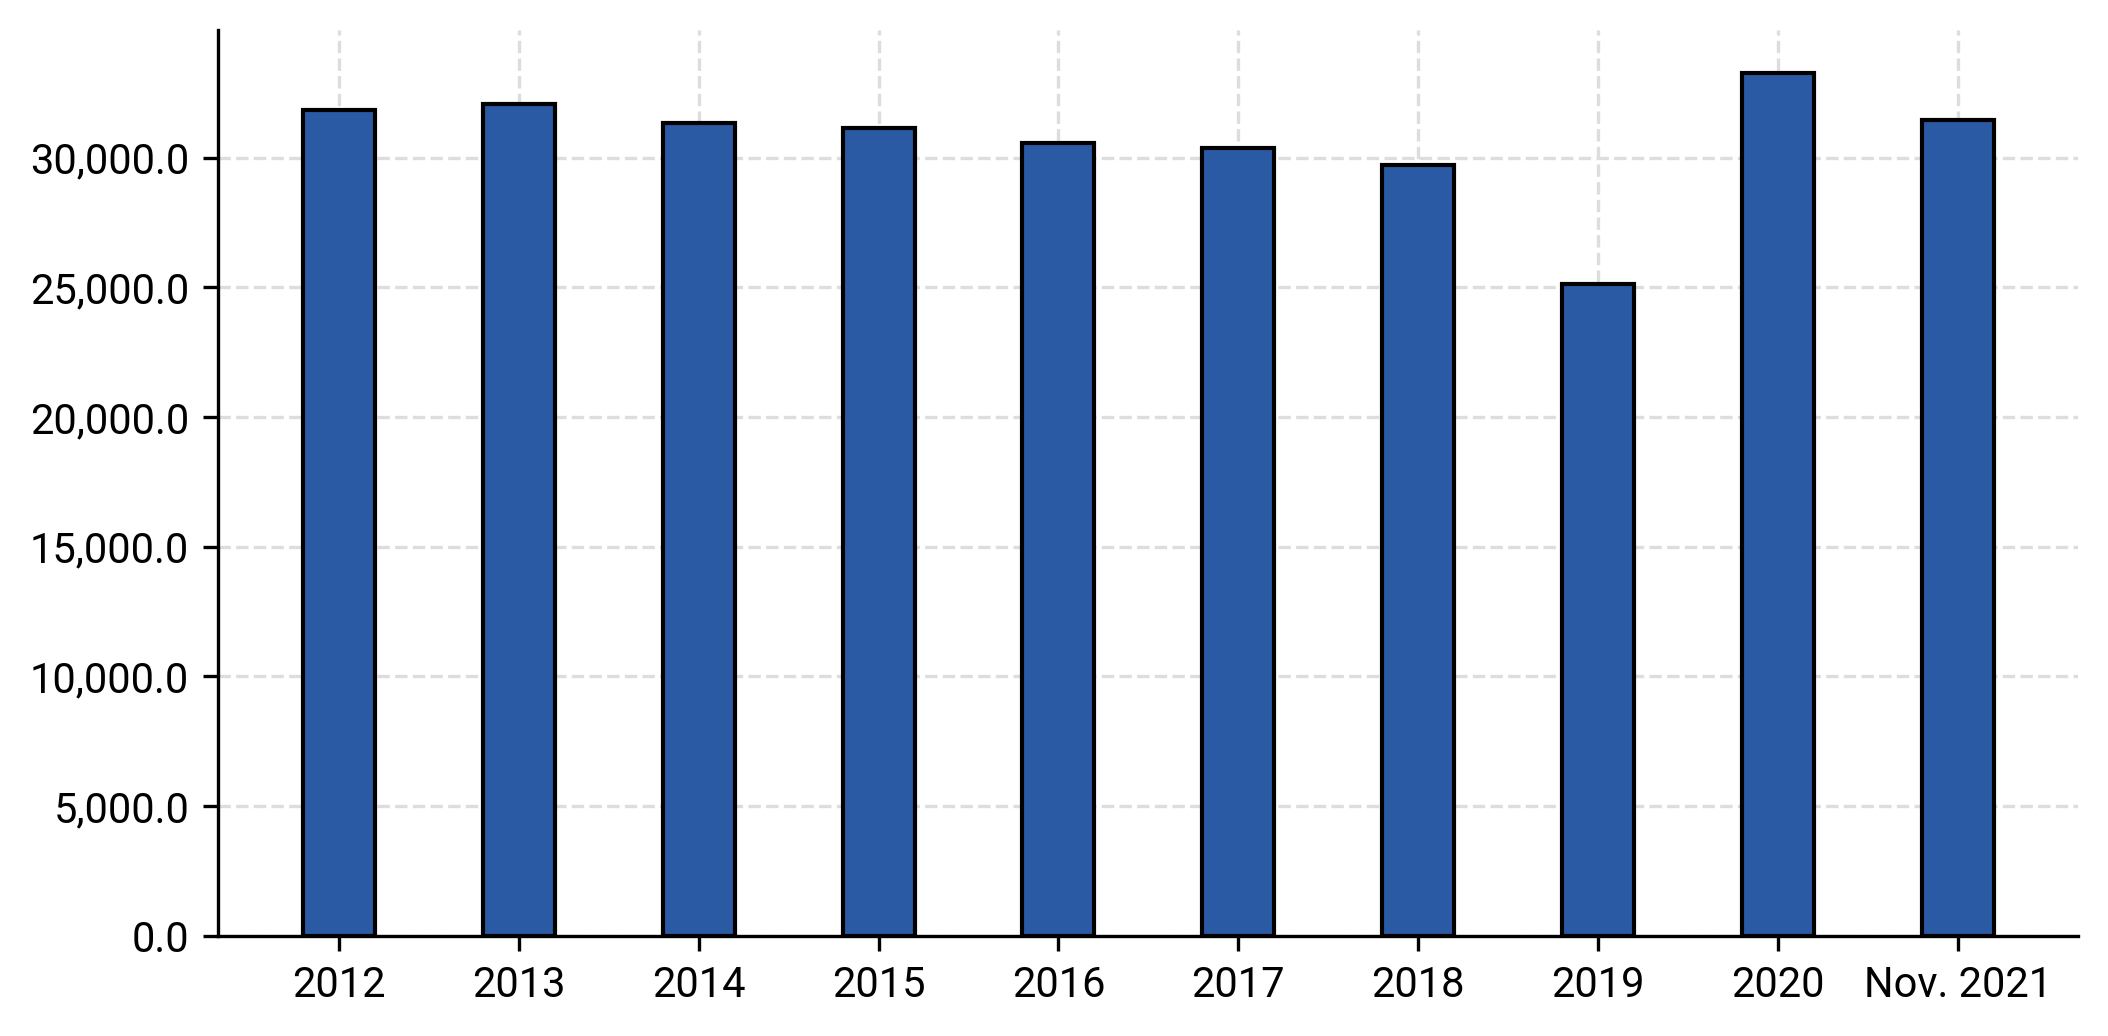

In [474]:
fig = plt.figure(figsize=(8, 4), dpi = 300)

ax = plt.subplot(111)

employee_data = hist_branch_data[hist_branch_data["institutions"] == "Banamex"]

ax.bar(range(0,employee_data.shape[0]), employee_data["21879990c9338ac"], width = .4, zorder = 3, edgecolor = "black")
xticks = ax.xaxis.set_ticks(range(0,employee_data.shape[0]))
xticklabels = ax.xaxis.set_ticklabels([str(x) for x in range(2012,2021)] + ["Nov. 2021"])
# ax.xaxis.se([str(x) for x in range(2012,2022)])
# ax.xasi

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.1f}'))
plt.savefig(
    "plots/total_emplyees.svg",
    dpi=300,
    bbox_inches="tight",
    facecolor="white",
    edgecolor="none",
    transparent=False,
)

## Mobile banking

In [475]:
mb_payload = {
    "type": "data_table",
    "operation": "sum",
    "language": "es",
    "categories": {
        "institutions": "all",
        "geography": [
            "b815762a2c6a283"
        ]
    },
    "request": [
        {
            "table": "mex_cnbv_cb_operational",
            "variables": [
                "164d316e22d6033"
            ]
        }
    ],
    "from":"2021-10-01",
    "to":"2021-10-01"
}

mb_response = get_tukan_api_request(mb_payload)

Success getting the data


In [476]:
trans_payload = {
    "type": "data_table",
    "operation": "sum",
    "language": "es",
    "categories": {
        "institutions": "all",
        "geography": [
            "b815762a2c6a283"
        ]
    },
    "request": [
        {
            "table": "mex_cnbv_cb_funding_data",
            "variables": [
                "0441165e44d8219"
            ]
        }
    ],
    "from":"2021-10-01",
    "to":"2021-10-01"
}

trans_response = get_tukan_api_request(trans_payload)

Success getting the data


In [477]:
mb_data = mb_response["data"]
trans_data = trans_response["data"]

In [478]:
mb_trans_data = pd.merge(mb_data, trans_data, how = "right")
mb_trans_data.loc[:,"mobile_per_account"] = mb_trans_data["164d316e22d6033"]/mb_trans_data["0441165e44d8219"]

# We bound it at a 100% and banks with over 1M accounts

mb_trans_data.loc[:,"mobile_per_account"] = [1 if x > 1 else x for x in mb_trans_data["mobile_per_account"]]

top_5_banks = mb_trans_data[(mb_trans_data["date"] == mb_trans_data["date"].max()) & (mb_trans_data["0441165e44d8219"]  > 1000000)].copy()
top_5_banks = top_5_banks.sort_values(by = "mobile_per_account", ascending = False).head(5)
top_5_banks = list(top_5_banks["institutions__ref"].unique())
mb_trans_data = mb_trans_data[mb_trans_data["institutions__ref"].isin(top_5_banks)].copy()
mb_trans_data = mb_trans_data.sort_values(by = "mobile_per_account", ascending = False)
mb_trans_data.reset_index(drop = True, inplace = True)
mb_trans_data.fillna(0, inplace = True)

In [326]:
mb_trans_data

,date,geography__ref,geography,institutions__ref,institutions,164d316e22d6033,0441165e44d8219,mobile_per_account
0,2021-10-01,b815762a2c6a283,México,0ba100f70c128de,Banco Azteca,15842488.0,13106067.0,1.000000
1,2021-10-01,b815762a2c6a283,México,aac4b448da912c3,Banamex,15243580.0,18323428.0,0.831917
2,2021-10-01,b815762a2c6a283,México,ae882fe094ece03,BBVA Bancomer,18520512.0,24314779.0,0.761698
3,2021-10-01,b815762a2c6a283,México,75c12fa4df9cd5b,Santander México,5140579.0,9200115.0,0.558752
4,2021-10-01,b815762a2c6a283,México,47eb578e3bafd16,HSBC México,3025149.0,6748177.0,0.448291


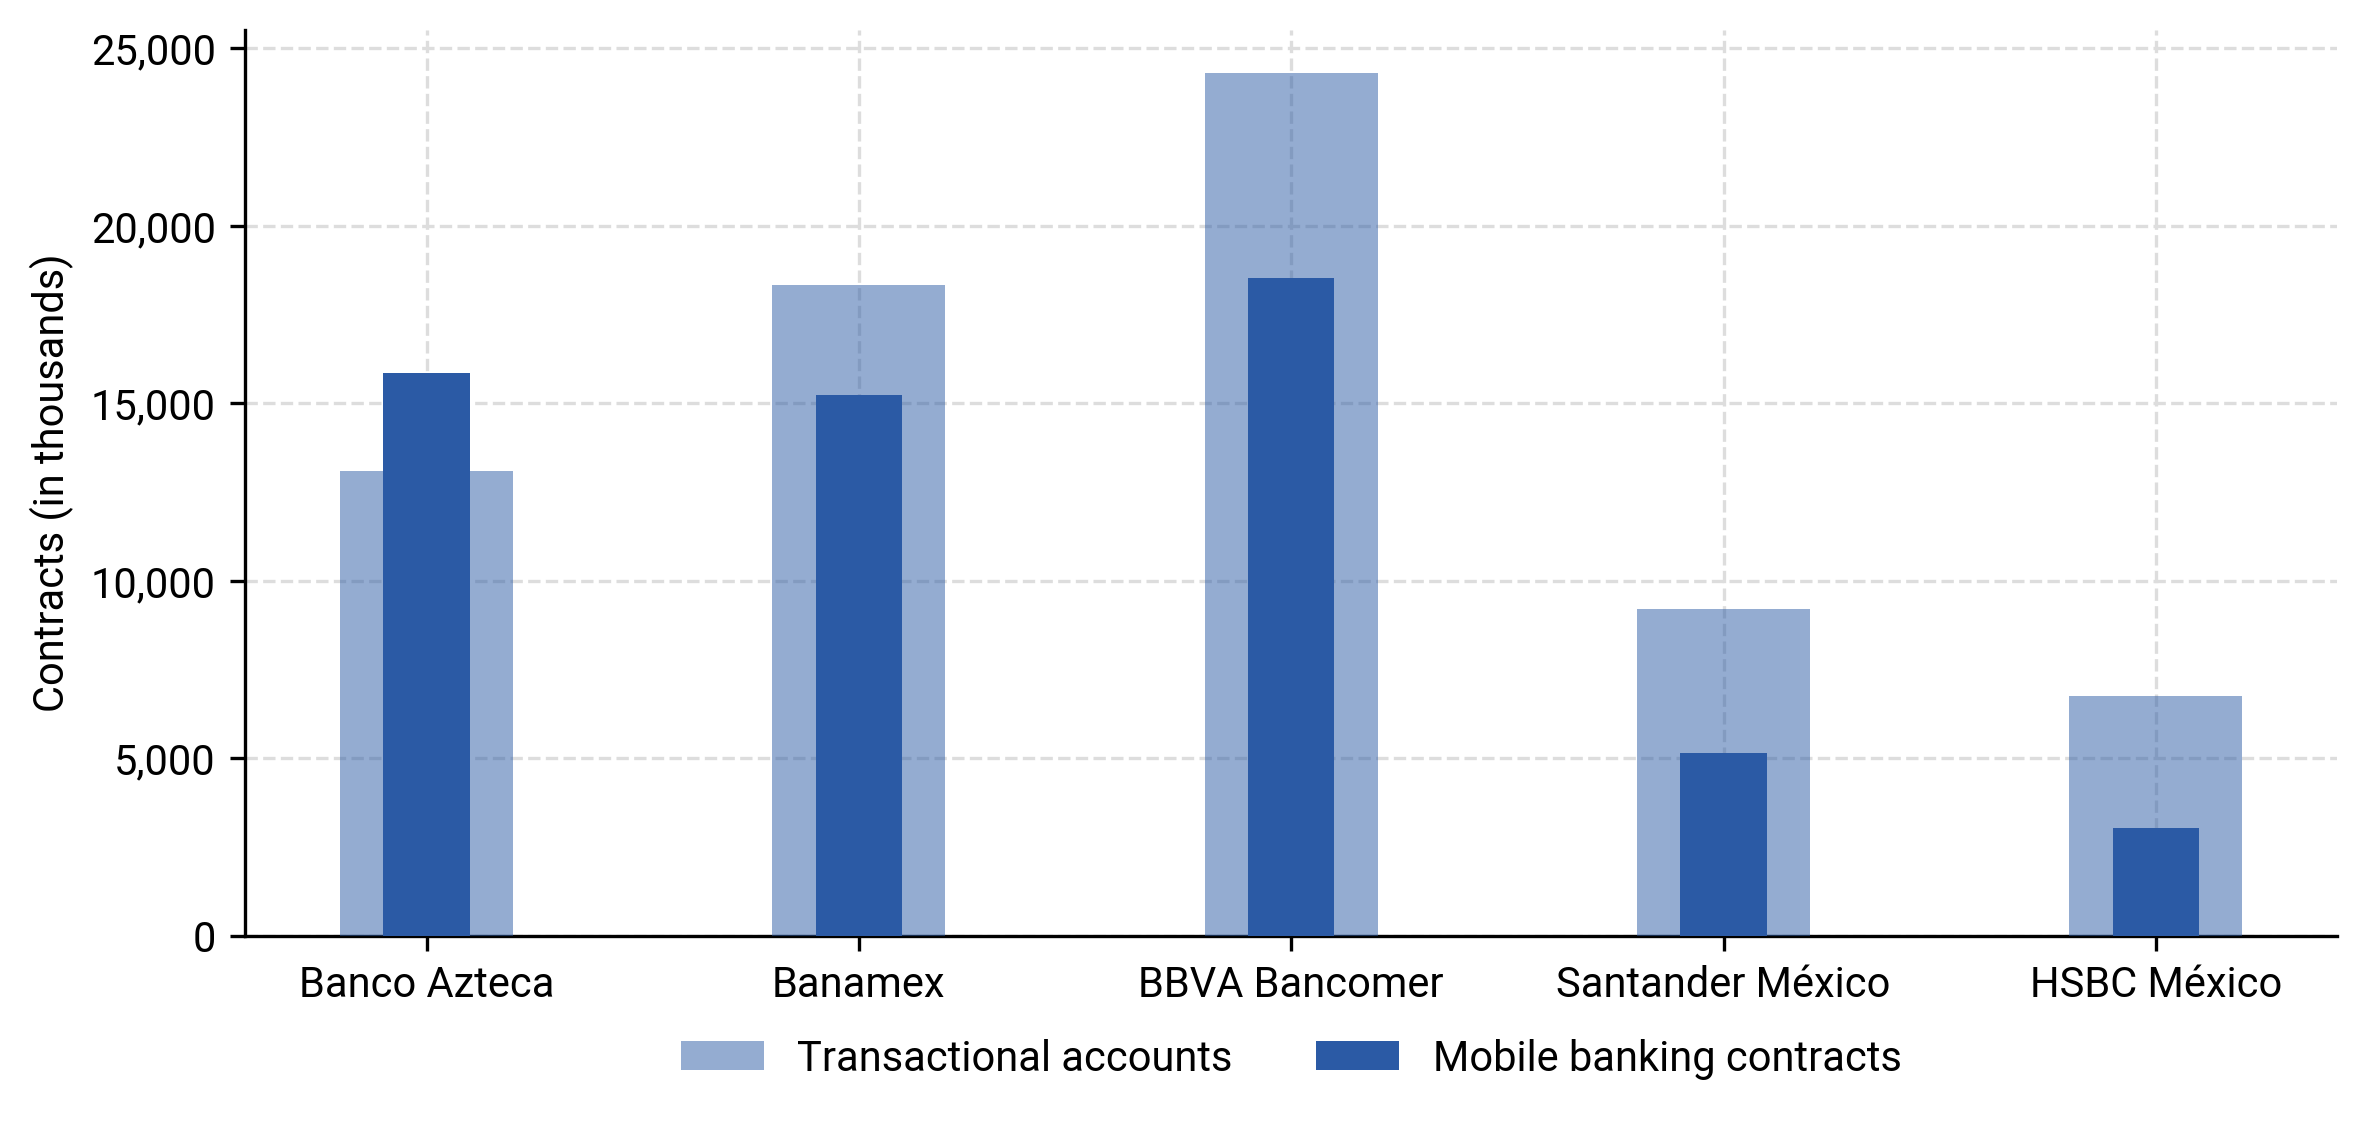

In [479]:
fig = plt.figure(dpi = 300, figsize = (9,4))
ax = plt.subplot(111)

past_filter = mb_trans_data["date"] == mb_trans_data["date"].min()
recent_filter = mb_trans_data["date"] == mb_trans_data["date"].max()
width = 0.2

ax.bar(mb_trans_data[recent_filter]["institutions"], mb_trans_data[recent_filter]["0441165e44d8219"]/1000, zorder = 3, width = width*2, alpha = 0.5, label = "Transactional accounts")
ax.bar(mb_trans_data[recent_filter]["institutions"], mb_trans_data[recent_filter]["164d316e22d6033"]/1000, zorder = 3, width = width, color = "#2B5AA5", label = "Mobile banking contracts")

# Add minor gridlines and format ticks
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

ax.legend(loc="lower center", bbox_to_anchor=(0.5, -0.2), ncol = 2)

# Add yaxis title

ax.yaxis.set_label_text("Contracts (in thousands)")

# Add title and subtitle


# Save plot with TUKAN logo, transparent and white.

# fig.text(0.1, -0.05, "Fuente: TUKAN, CNBV", fontsize=8)


plt.savefig(
    "plots/mobile_banking.svg",
    dpi=300,
    bbox_inches="tight",
    facecolor="white",
    edgecolor="none",
    transparent=False,
)

## Efficiency Ratio

In [480]:
payload = {
    "type": "data_table",
    "operation": "sum",
    "language": "en",
    "categories": {
        "institutions": "all"
    },
    "request": [
        {
            "table": "mex_cnbv_cb_income_statement",
            "variables": [
                "b20c1d56c3cbe96",
                "144b301e50c7a67",
                "4383de47775b541",
                "c527586c5f852ce",
                "9acb0d8ce48d518",
                "ed1d12a468dbd66",
                "b8f24dd9230d269",
                "e6aa7b4c9299e8f",
                "41ed2726f53af05",
                "beb5cfec9761423",
                "8a7ec243c69f691"
            ]
        }
    ],
    "from": "2000-01-01"
}

response = get_tukan_api_request(payload)
is_data = response["data"]

Success getting the data


In [481]:
# Efficiency ratio

is_data.loc[:,'net_com'] = is_data.loc[:,'9acb0d8ce48d518'] - is_data.loc[:,'ed1d12a468dbd66']
is_data.loc[:,"eff_den"] = (is_data.loc[:,'b20c1d56c3cbe96'] - is_data.loc[:,'144b301e50c7a67'] +  is_data.loc[:,'net_com']+  is_data.loc[:,'beb5cfec9761423'] + is_data.loc[:,'b8f24dd9230d269'])
is_data.loc[:,"eff_num"] = is_data.loc[:,'e6aa7b4c9299e8f'] 

is_data.sort_values(by = ['institutions__ref', 'date'], inplace = True)
is_data = is_data.reset_index(drop = True).copy()

is_data.loc[:,'ltm_eff_den'] = (
    is_data.groupby(['institutions__ref'])
    .rolling(on="date", window=12, min_periods=12)['eff_den']
    .sum()
    .reset_index(drop = True)
)

is_data.loc[:,'ltm_eff_num'] = (
    is_data.groupby(['institutions__ref'])
    .rolling(on="date", window=12, min_periods=12)['eff_num']
    .sum()
    .reset_index(drop = True)
)

is_data.loc[:,'ltm_write_offs'] = (
    is_data.groupby(['institutions__ref'])
    .rolling(on="date", window=12, min_periods=12)['8a7ec243c69f691']
    .sum()
    .reset_index(drop = True)
)


is_data.loc[:,'eficiencia'] = is_data["ltm_eff_num"]/is_data["ltm_eff_den"]

In [482]:
g7_banks = ["BBVA Bancomer","Banorte","Santander México","Banamex","Scotiabank Inverlat","HSBC México","Banco Inbursa"]
g7_df = is_data[is_data["institutions"].isin(g7_banks)]
g7_df = g7_df[g7_df["date"] > "2011-12-01"]

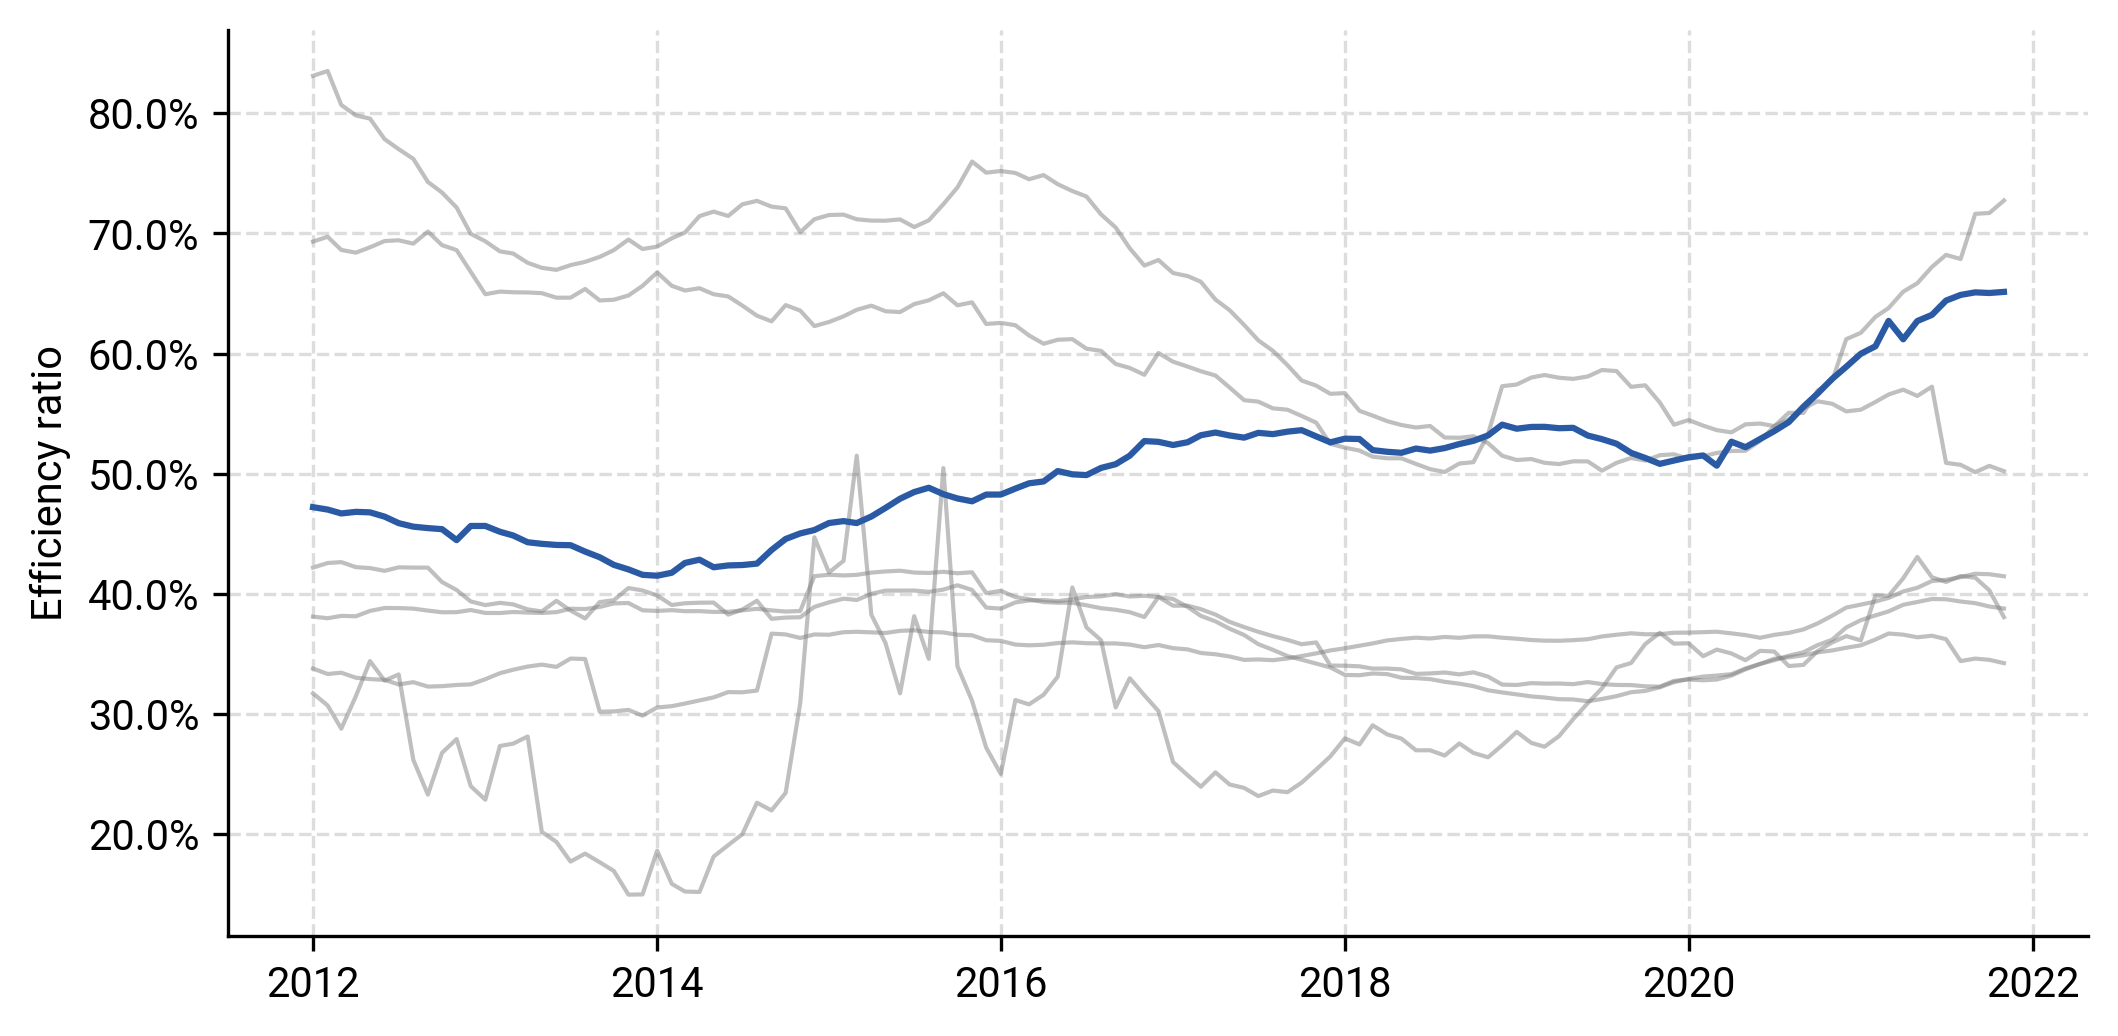

In [483]:
fig = plt.figure(figsize = (8, 4), dpi = 300)
ax = plt.subplot(111)

for x in g7_df["institutions"].unique():
    aux_df = g7_df[g7_df["institutions"] == x].copy()
    if x == "Banamex":
        ax.plot(aux_df["date"], aux_df["eficiencia"], label = x, zorder = 20)
    elif x == "HSBC México":
        aux_df = aux_df[aux_df["date"] > "2004-01-01"]
        ax.plot(aux_df["date"], aux_df["eficiencia"], color = "gray", alpha = 0.5, linewidth = 1)
        continue
    else:
        ax.plot(aux_df["date"], aux_df["eficiencia"], color = "gray", alpha = 0.5, linewidth = 1)
        continue
    


ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.1%}'))
ax.xaxis.set_major_locator(mdates.YearLocator(2))

ax.yaxis.set_label_text("Efficiency ratio")
plt.savefig(
    "plots/efficiency_ratio.svg",
    dpi=300,
    bbox_inches="tight",
    facecolor="white",
    edgecolor="none",
    transparent=False,
)

## Loan Portfolio Breakdown

In [484]:
payload = {
    "type": "data_table",
    "operation": "sum",
    "language": "en",
    "group_by": [
        "institutions"
    ],
    "categories": {
        "institutions": "all"
    },
    "request": [
        {
            "table": "mex_cnbv_cb_balance_sheet",
            "variables": [
                "aa9a4f2f8a95db3",
                "fe3b7ecbebca755",
                "a4526a18f4faf4a",
                "a8a81eed03dd98f",
                "fa32b08b999b9b0",
                "1f445d824be3409",
                "79e1d987d9e13b1",
                "f4a595d2c735aab",
                "ef7f7c74906f369",
                "b6ea225471cdaeb",
                "1fceb9e670ebeff",
                "4173bc0829231f9",
                "b4ea69bfe2b9735",
                "d30540164451755",
                "8a8891292a2219c",
                "5bfd611a3d42430",
                "1440752a29703dd",
                "5a454d2ce3208f6",
                "e92557c7fb5563c",
                "9fd52038aa9f3b7",
                "4fff36d83241bb2",
                "ef6701f81d74dcb",
                "d9c118a75d6b18c",
                "a96afb11c29d06f"
            ]
        }
    ]
}

loan_response = get_tukan_api_request(payload)
loan_api = loan_response["data"]

Success getting the data


In [522]:
loan_data = loan_api.copy()

In [523]:
loan_data.loc[:,"cons"] = loan_data["b6ea225471cdaeb"] + loan_data["ef6701f81d74dcb"]
loan_data.loc[:,"mkt_share_cons"] = loan_data["cons"]/loan_data[loan_data["institutions"] == "Commercial banks"]["cons"].iloc[0]
loan_data = loan_data[loan_data["institutions"] != "Commercial banks"].copy()
cons_mkt = loan_data.sort_values(by = "mkt_share_cons", ascending=False)
cons_mkt = cons_mkt.head(6)

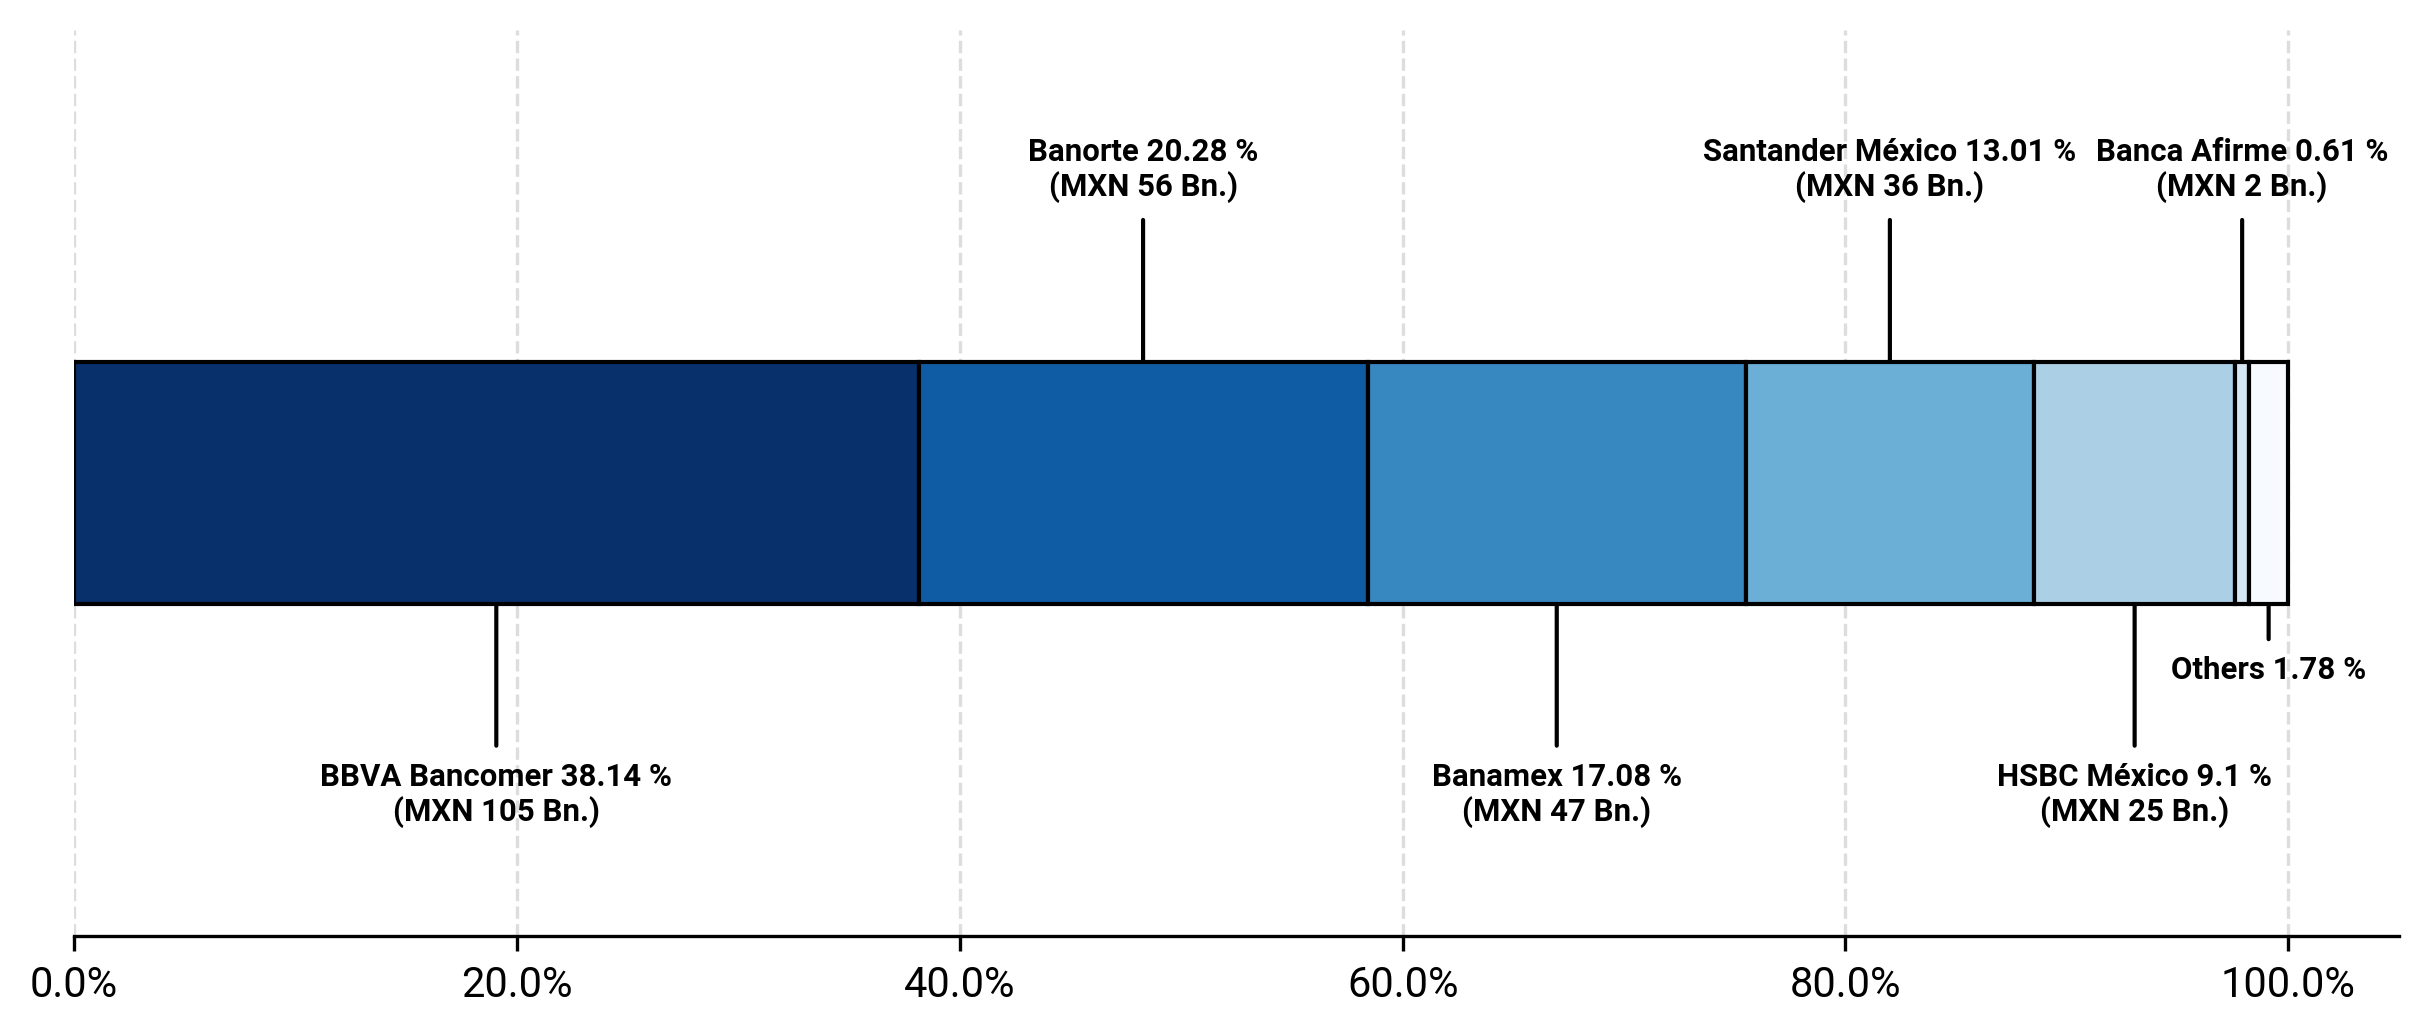

In [526]:
fig = plt.figure(figsize = (10, 4), dpi = 300)
ax = plt.subplot(111)

ax.spines["left"].set_visible(False)
ax.yaxis.set_visible(False)
cmap = mpl.cm.get_cmap("Blues_r", 7)

left = 0
for index, data in enumerate(cons_mkt["mkt_share_cons"]):
    institution = cons_mkt["institutions"].iloc[index]
    cons = cons_mkt["cons"].iloc[index]/1000000000
    if index % 2 == 0:
        mult_aux = -1
    else:
        mult_aux = 1
    ax.annotate(
        f"{institution} {round(data*100,2)} %\n(MXN {cons:,.0f} Bn.)",
        xy=(left + data/2, 0),
        xycoords="data",
        xytext=(0, mult_aux*75),
        textcoords="offset points",
        color="black",
        size=7.5,
        va="center",
        ha="center",
        weight="bold",
        arrowprops=dict(
        arrowstyle="->", ec="black", connectionstyle="arc3"
        ),
    )
    if cons_mkt["institutions"].iloc[index] == "Banamex":
        ax.barh(0, data, left=left, zorder = 3, ec = "black", color = cmap(index))      
    else:
        ax.barh(0, data, left=left, zorder = 3, ec = "black", color = cmap(index))
    left += data


ax.annotate(
    f"Others {round((1 - left)*100,2)} %",
    xy=(left + (1 - left)/2, 0),
    xycoords="data",
    xytext=(0, -1*45),
    textcoords="offset points",
    color="black",
    size=7.5,
    va="center",
    ha="center",
    weight="bold",
    arrowprops=dict(
    arrowstyle="->", ec="black", connectionstyle="arc3"
    ),
)
ax.barh(0, 1 - left, left=left, zorder = 3, ec = "black", color = cmap(7))

ax.set_ylim(-1.5,1.5)
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.1%}'))
plt.savefig(
    "plots/payroll_mkt_share.svg",
    dpi=300,
    bbox_inches="tight",
    facecolor="white",
    edgecolor="none",
    transparent=False,
)

In [487]:
payload = {
    "type": "data_table",
    "operation": "sum",
    "language": "en",
    "group_by": [
        "institutions"
    ],
    "categories": {
        "institutions": [
            "aac4b448da912c3",
            "0c959ae6bc0d063"
        ]
    },
    "request": [
        {
            "table": "mex_cnbv_cb_balance_sheet",
            "variables": [
                "aa9a4f2f8a95db3",
                "fe3b7ecbebca755",
                "a4526a18f4faf4a",
                "a8a81eed03dd98f",
                "fa32b08b999b9b0",
                "1f445d824be3409",
                "79e1d987d9e13b1",
                "f4a595d2c735aab",
                "ef7f7c74906f369",
                "b6ea225471cdaeb",
                "1fceb9e670ebeff",
                "4173bc0829231f9",
                "b4ea69bfe2b9735",
                "d30540164451755",
                "8a8891292a2219c",
                "5bfd611a3d42430",
                "1440752a29703dd",
                "5a454d2ce3208f6",
                "e92557c7fb5563c",
                "9fd52038aa9f3b7",
                "4fff36d83241bb2",
                "ef6701f81d74dcb",
                "d9c118a75d6b18c",
                "a96afb11c29d06f"
            ]
        }
    ],
    "from": "2000-01-01"
}

loan_response = get_tukan_api_request(payload)
loan_yoy = loan_response["data"]

Success getting the data


In [504]:
loan_hist = loan_yoy.copy()

In [527]:

loan_hist.loc[:,"cons"] = loan_hist["b6ea225471cdaeb"] + loan_hist["ef6701f81d74dcb"]

loan_hist.sort_values(by = ['institutions__ref', 'date'], inplace = True)
loan_hist = loan_hist.reset_index(drop = True).copy()

loan_hist.loc[:,"lag"] = loan_hist.groupby(["institutions__ref"])["cons"].shift(12)

loan_hist.loc[:,"yoy"] = loan_hist["cons"]/loan_hist["lag"] - 1
# loan_hist = loan_hist[loan_hist["institutions"] != "Commercial banks"].copy()


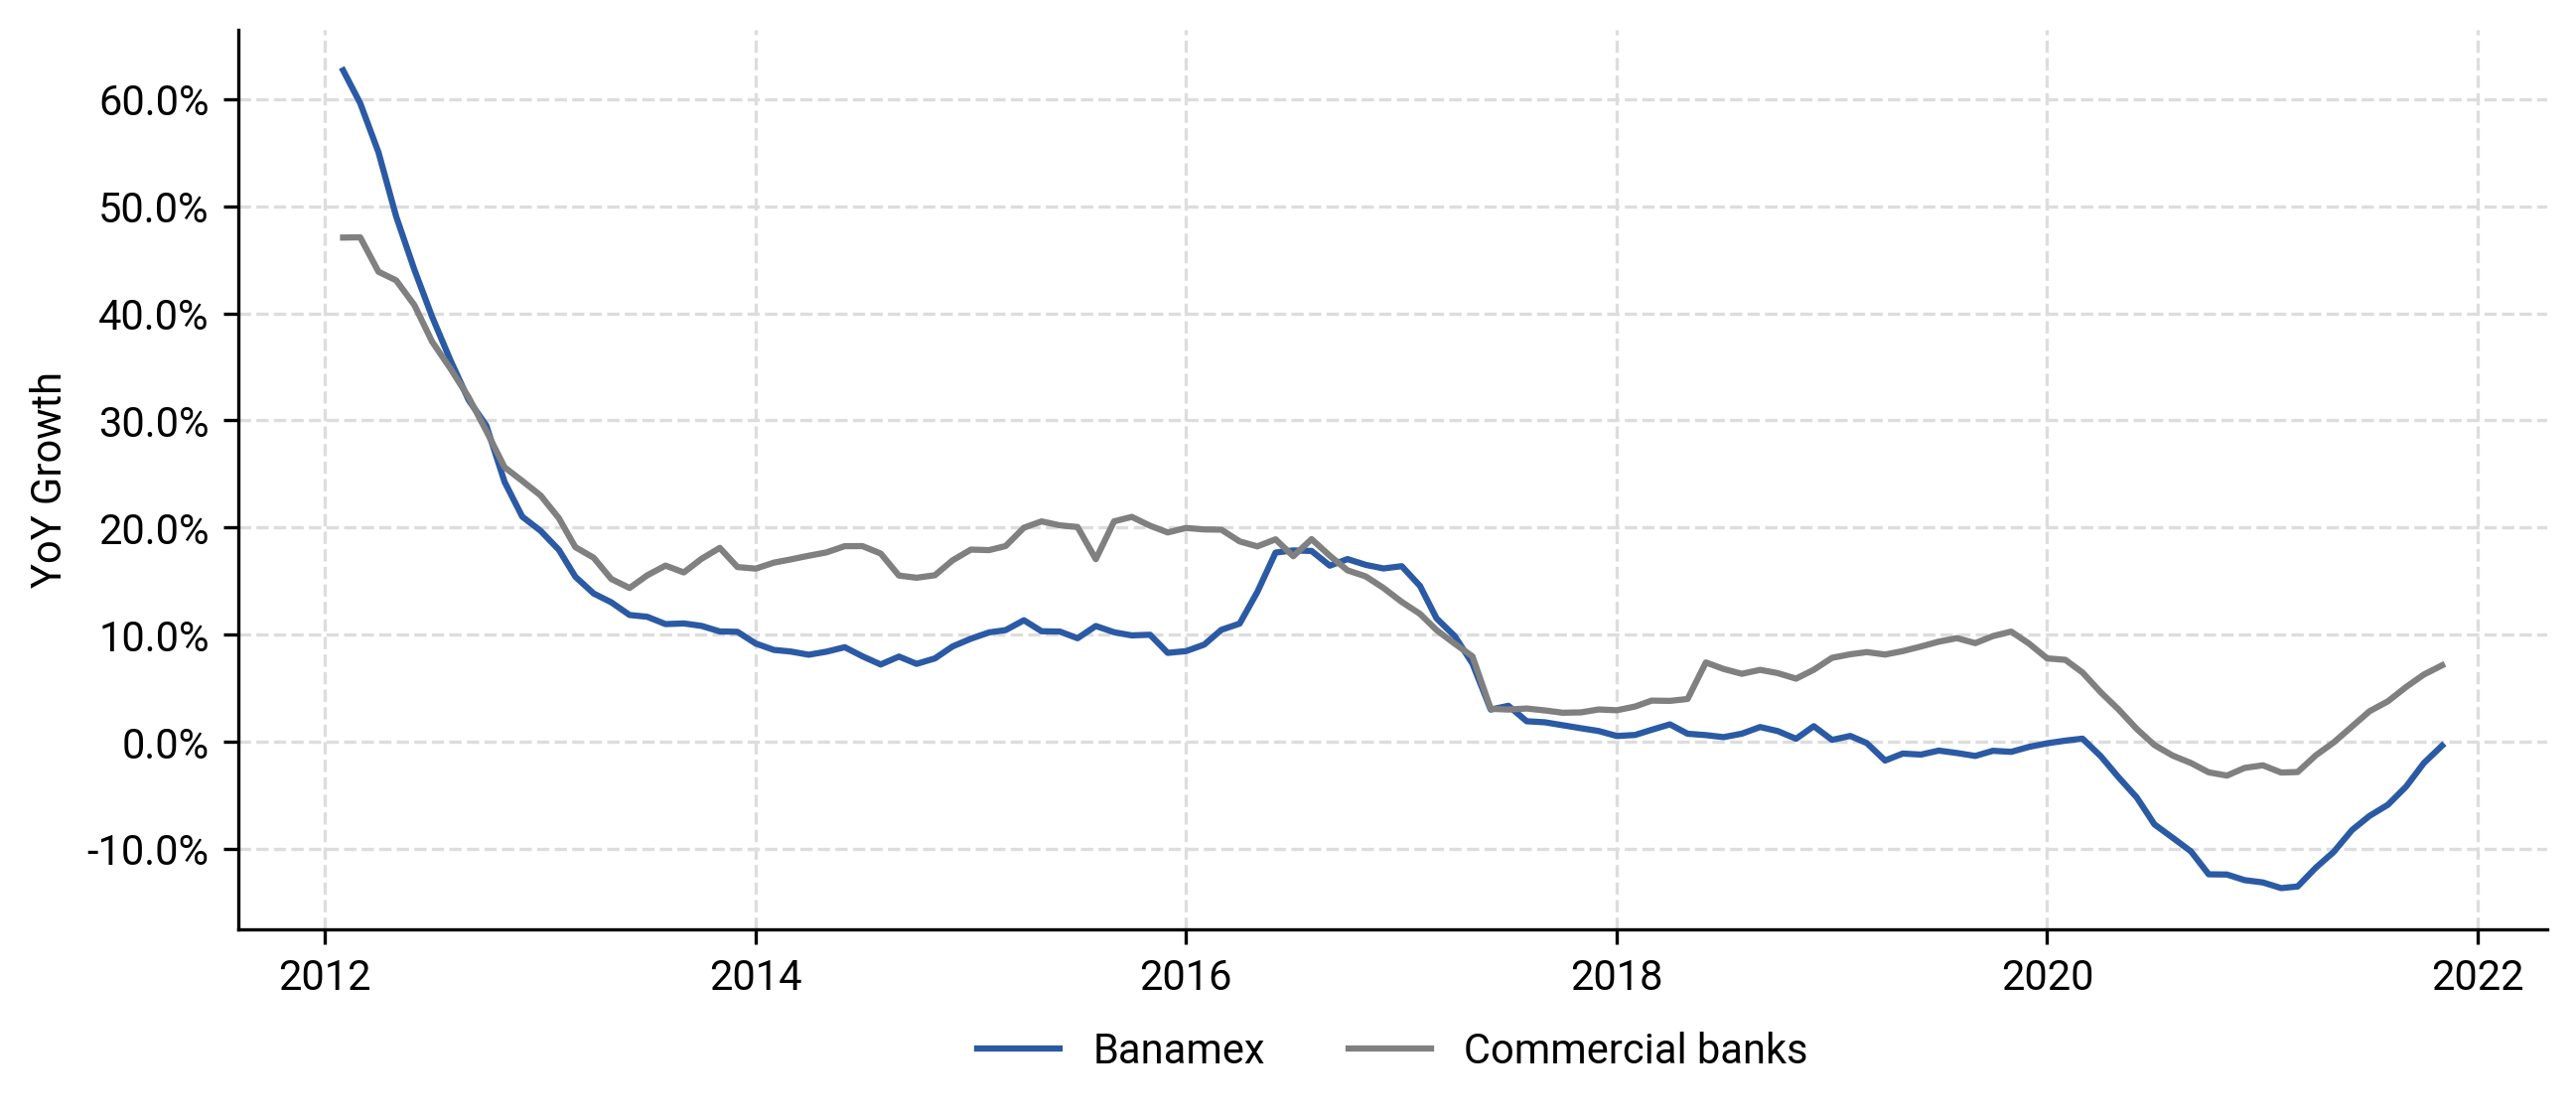

In [528]:
fig = plt.figure(figsize = (10, 4), dpi = 300)
ax = plt.subplot(111)


ax.plot(loan_hist[loan_hist["institutions"] == "Banamex"]["date"], loan_hist[loan_hist["institutions"] == "Banamex"]["yoy"], label = "Banamex")
ax.plot(loan_hist[loan_hist["institutions"] == "Commercial banks"]["date"], loan_hist[loan_hist["institutions"] == "Commercial banks"]["yoy"], color = "gray", label = "Commercial banks")

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.1%}'))
ax.yaxis.set_label_text("YoY Growth")

ax.xaxis.set_major_locator(mdates.YearLocator(2))

ax.legend(loc="lower center", bbox_to_anchor=(0.5, -0.2), ncol = 2)

plt.savefig(
    "plots/personal_yoy.svg",
    dpi=300,
    bbox_inches="tight",
    facecolor="white",
    edgecolor="none",
    transparent=False,
)

## NPL Ratio

In [529]:
payload = {
    "type": "data_table",
    "operation": "sum",
    "language": "en",
    "categories": {
        "institutions": "all"
    },
    "request": [
        {
            "table": "mex_cnbv_cb_balance_sheet",
            "variables": [
                "aa9a4f2f8a95db3",
                "b4ea69bfe2b9735"
            ]
        }
    ],
    "from": "2000-01-11"
}

response = get_tukan_api_request(payload)
bs_data = response["data"]

Success getting the data


In [530]:
merged_data = pd.merge(is_data, bs_data)

In [531]:
g7_banks = ["BBVA Bancomer","Banorte","Santander México","Banamex","Scotiabank Inverlat","HSBC México","Banco Inbursa"]
g7_df = merged_data[merged_data["institutions"].isin(g7_banks)].copy()
# g7_df = g7_df[g7_df["date"] > "2011-12-01"]
g7_df.loc[:,"total_loans"] = g7_df["aa9a4f2f8a95db3"] + g7_df["b4ea69bfe2b9735"]

In [532]:
g7_df.loc[:,'npl'] = g7_df.loc[:,'b4ea69bfe2b9735'] / g7_df.loc[:,'total_loans']
g7_df.loc[:,'tda'] =   (g7_df.loc[:,'b4ea69bfe2b9735'] + g7_df.loc[:,'ltm_write_offs']) / (g7_df.loc[:,'total_loans'] + g7_df.loc[:,'ltm_write_offs'])

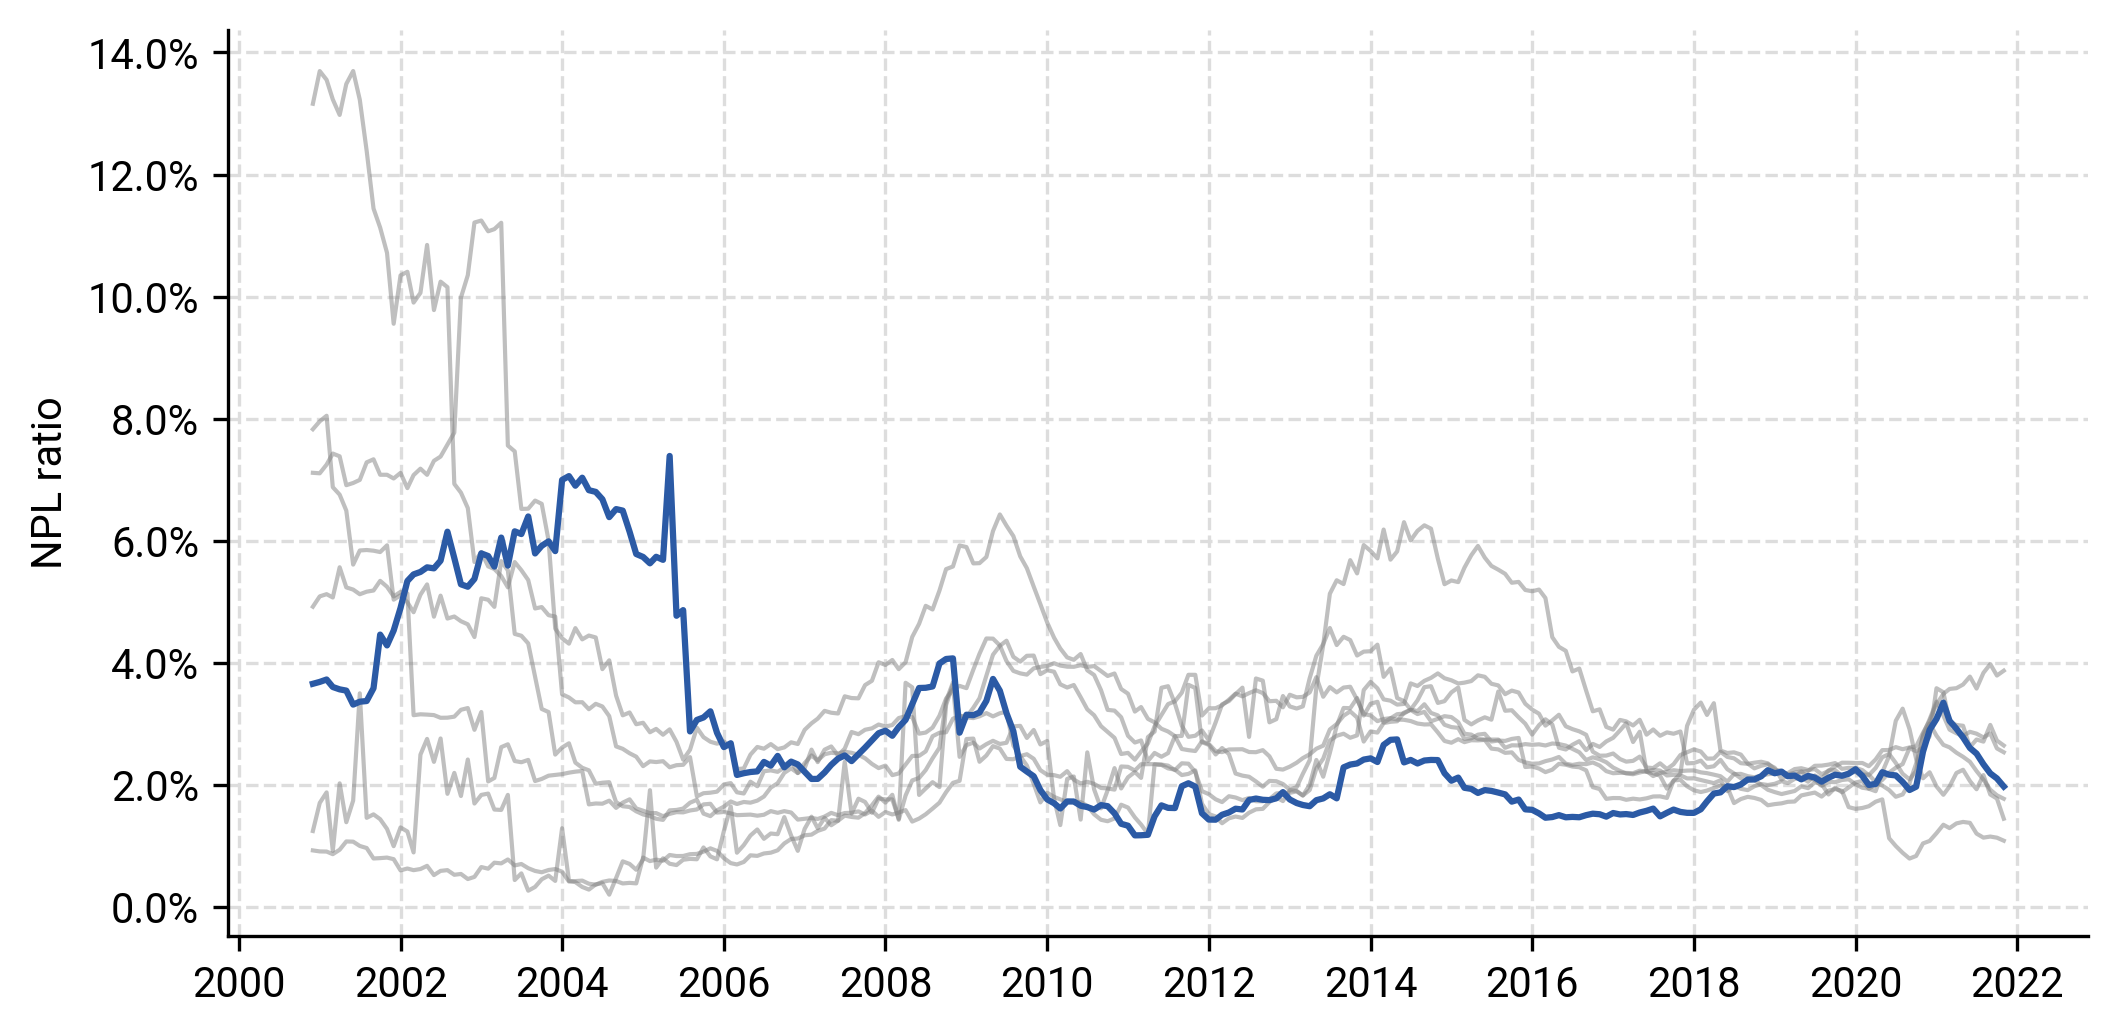

In [535]:
fig = plt.figure(figsize = (8, 4), dpi = 300)
ax = plt.subplot(111)

for x in g7_df["institutions"].unique():
    aux_df = g7_df[g7_df["institutions"] == x].copy()
    if x == "Banamex":
        ax.plot(aux_df["date"], aux_df["npl"], label = x, zorder = 20)
    elif x == "HSBC México":
        # aux_df = aux_df[aux_df["date"] > "2004-01-01"]
        ax.plot(aux_df["date"], aux_df["npl"], color = "gray", alpha = 0.5, linewidth = 1)
        continue
    else:
        ax.plot(aux_df["date"], aux_df["npl"], color = "gray", alpha = 0.5, linewidth = 1)
        continue
    


ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.1%}'))
ax.xaxis.set_major_locator(mdates.YearLocator(2))

ax.yaxis.set_label_text("NPL ratio")
plt.savefig(
    "plots/npl_ratio_true.svg",
    dpi=300,
    bbox_inches="tight",
    facecolor="white",
    edgecolor="none",
    transparent=False,
)